In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [3]:
indication_mapping = {'Melanoma':'KML', 
                      'Head & Neck Ca':'KHN',
                      'Other Head & Neck Ca':'KHN',
                      'NSCLC':'KLC',
                      'Other than SCLC':'KLC',
                      'Urothelial Ca':'KUC',
                      'RCC':'KRC'
                      }

#### Creating indication launch and patient count data for key competitiors.

In [4]:
df_mdv_indication = pd.read_csv("MDV_IndicationMaster.csv",encoding= 'unicode_escape',usecols=[1,2,4])
df_mdv_indication.columns = ['YM','Drug','Indication']
# df_mdv_indication['Indication'] = df_mdv_indication['Indication'].map(indication_mapping)
df_mdv_indication['Indication'] = df_mdv_indication['Indication'].replace(indication_mapping)
# df_mdv_indication['Indication'].fillna('Others',inplace=True)
df_mdv_indication.rename(columns={'YM':'Launch_month'},inplace=True)
df_mdv_indication = df_mdv_indication.sort_values(['Drug','Launch_month'])
df_mdv_indication = df_mdv_indication.drop_duplicates(['Drug','Indication'],keep='first')
df_mdv_indication = df_mdv_indication.reset_index(drop=True)
print(df_mdv_indication.shape)
df_mdv_indication

(104, 3)


Launch_month                           Drug  Indication
0          201401               Afatinib Maleate         KLC
1          201804                   Atezolizumab         KLC
2          201908                   Atezolizumab        SCLC
3          201909                   Atezolizumab   Breast Ca
4          202009                   Atezolizumab    Liver Ca
..            ...                            ...         ...
99         201603  Trametinib Dimethyl Sulfoxide         KML
100        201803  Trametinib Dimethyl Sulfoxide         KLC
101        201103                    Trastuzumab  Gastric Ca
102        201806                    Trastuzumab   Breast Ca
103        201309          Trastuzumab Emtansine   Breast Ca

[104 rows x 3 columns]

In [5]:
df_mdv_tumor = pd.read_csv("MDV_tumortype_data.csv",encoding= 'unicode_escape')
df_mdv_tumor.columns = ['YM','Drug','Indication','number_of_patients']
df_mdv_tumor['Indication'] = df_mdv_tumor['Indication'].replace(indication_mapping)
# df_mdv_tumor['Indication'].fillna('Others',inplace=True)
df_mdv_tumor = df_mdv_tumor.sort_values(['Drug','YM']).reset_index(drop=True)
df_mdv_tumor

YM                               Drug   Indication  \
0       201812                        Abemaciclib    Breast Ca   
1       201812                        Abemaciclib       Others   
2       201812                        Abemaciclib   Thyroid Ca   
3       201901                        Abemaciclib    Breast Ca   
4       201901                        Abemaciclib          KLC   
...        ...                                ...          ...   
111793  202002  Yttrium(90Y) Ibritumomab Tiuxetan  Non-Hodgkin   
111794  202003  Yttrium(90Y) Ibritumomab Tiuxetan    Breast Ca   
111795  202003  Yttrium(90Y) Ibritumomab Tiuxetan  Non-Hodgkin   
111796  202003  Yttrium(90Y) Ibritumomab Tiuxetan       Others   
111797  202004  Yttrium(90Y) Ibritumomab Tiuxetan       Others   

        number_of_patients  
0                       21  
1                       27  
2                        1  
3                       60  
4                        1  
...                    ...  
111793                   1  
111794                   1  
111795                   2  
111796                   1  
111797                   1  

[111798 rows x 4 columns]

In [6]:
df_patient_count_and_launch = df_mdv_indication.merge(df_mdv_tumor, on = ['Drug','Indication'],how='left')

In [7]:
df_patient_count_and_launch.isnull().sum()

Launch_month          0
Drug                  0
Indication            0
YM                    9
number_of_patients    9
dtype: int64

In [8]:
df_patient_count_and_launch = df_patient_count_and_launch[df_patient_count_and_launch['number_of_patients'].notnull()]
df_patient_count_and_launch['YM'] = df_patient_count_and_launch['YM'].astype(int)

In [9]:
df_patient_count_and_launch.nunique()

Launch_month            66
Drug                    30
Indication              28
YM                      56
number_of_patients    1013
dtype: int64

In [10]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine  Breast Ca  202007   
4963        201309  Trastuzumab Emtansine  Breast Ca  202008   
4964        201309  Trastuzumab Emtansine  Breast Ca  202009   
4965        201309  Trastuzumab Emtansine  Breast Ca  202010   
4966        201309  Trastuzumab Emtansine  Breast Ca  202011   

      number_of_patients  
0                  318.0  
1                  324.0  
2                  318.0  
3                  325.0  
4                  328.0  
...                  ...  
4962               185.0  
4963               178.0  
4964               183.0  
4965               179.0  
4966               178.0  

[4958 rows x 5 columns]

In [11]:
df_patient_count_and_launch['is_data_ok'] = np.where(df_patient_count_and_launch['YM']>= df_patient_count_and_launch['Launch_month'],1,0)

In [12]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine  Breast Ca  202007   
4963        201309  Trastuzumab Emtansine  Breast Ca  202008   
4964        201309  Trastuzumab Emtansine  Breast Ca  202009   
4965        201309  Trastuzumab Emtansine  Breast Ca  202010   
4966        201309  Trastuzumab Emtansine  Breast Ca  202011   

      number_of_patients  is_data_ok  
0                  318.0           1  
1                  324.0           1  
2                  318.0           1  
3                  325.0           1  
4                  328.0           1  
...                  ...         ...  
4962               185.0           1  
4963               178.0           1  
4964               183.0           1  
4965               179.0           1  
4966               178.0           1  

[4958 rows x 6 columns]

In [13]:
df_patient_count_and_launch['is_data_ok'].value_counts()

1    4505
0     453
Name: is_data_ok, dtype: int64

In [14]:
df_patient_count_and_launch[df_patient_count_and_launch['is_data_ok']==0]['Drug'].unique()

array(['Atezolizumab', 'Bevacizumab', 'Everolimus', 'Ipilimumab',
       'Nivolumab', 'Olaparib', 'Pembrolizumab', 'Ramucirumab',
       'Regorafenib Hydrate', 'Trastuzumab'], dtype=object)

In [15]:
filter_for_0_patients = (df_patient_count_and_launch['is_data_ok']==0) 
df_patient_count_and_launch.loc[filter_for_0_patients,'number_of_patients'] = 0
df_patient_count_and_launch.loc[filter_for_0_patients,'number_of_patients']

88      0.0
89      0.0
90      0.0
91      0.0
108     0.0
       ... 
4876    0.0
4877    0.0
4878    0.0
4879    0.0
4880    0.0
Name: number_of_patients, Length: 453, dtype: float64

In [16]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine  Breast Ca  202007   
4963        201309  Trastuzumab Emtansine  Breast Ca  202008   
4964        201309  Trastuzumab Emtansine  Breast Ca  202009   
4965        201309  Trastuzumab Emtansine  Breast Ca  202010   
4966        201309  Trastuzumab Emtansine  Breast Ca  202011   

      number_of_patients  is_data_ok  
0                  318.0           1  
1                  324.0           1  
2                  318.0           1  
3                  325.0           1  
4                  328.0           1  
...                  ...         ...  
4962               185.0           1  
4963               178.0           1  
4964               183.0           1  
4965               179.0           1  
4966               178.0           1  

[4958 rows x 6 columns]

In [17]:
df_patient_count_and_launch['Indication'].unique()

array(['KLC', 'SCLC', 'Breast Ca', 'Liver Ca', 'Others', 'KRC', 'CRC',
       'Glioma', 'Ovarian Ca', 'Cervical Ca', 'KHN', 'KML', 'Gastric Ca',
       'Esophageal Ca', 'Endmetarial Ca', 'Prostate',
       'Pancreatic Neuroendocrine Tumors', 'Vascular lipoma',
       'Subepedymal giant cell astrocytoma', 'Pancreatic Ca',
       'Thyroid Ca', 'Hodgkin', 'Malignant pleural mesothelioma',
       'CRC MSI-H', 'Liposarcoma', 'KUC', 'MSI-H',
       'Gastrointestinal stromal tumor'], dtype=object)

In [18]:
filter_for_specific_indications = (df_patient_count_and_launch['Indication']!='KLC') & \
                        (df_patient_count_and_launch['Indication']!='KRC') & \
                        (df_patient_count_and_launch['Indication']!='KHN') & \
                        (df_patient_count_and_launch['Indication']!='KML') & \
                        (df_patient_count_and_launch['Indication']!='KUC')
df_patient_count_and_launch.loc[filter_for_specific_indications,'Indication'] = 'Others'
df_patient_count_and_launch.loc[filter_for_specific_indications,'Indication']

88      Others
89      Others
90      Others
91      Others
92      Others
         ...  
4962    Others
4963    Others
4964    Others
4965    Others
4966    Others
Name: Indication, Length: 2980, dtype: object

In [19]:
df_patient_count_and_launch

Launch_month                   Drug Indication      YM  \
0           201401       Afatinib Maleate        KLC  201604   
1           201401       Afatinib Maleate        KLC  201605   
2           201401       Afatinib Maleate        KLC  201606   
3           201401       Afatinib Maleate        KLC  201607   
4           201401       Afatinib Maleate        KLC  201608   
...            ...                    ...        ...     ...   
4962        201309  Trastuzumab Emtansine     Others  202007   
4963        201309  Trastuzumab Emtansine     Others  202008   
4964        201309  Trastuzumab Emtansine     Others  202009   
4965        201309  Trastuzumab Emtansine     Others  202010   
4966        201309  Trastuzumab Emtansine     Others  202011   

      number_of_patients  is_data_ok  
0                  318.0           1  
1                  324.0           1  
2                  318.0           1  
3                  325.0           1  
4                  328.0           1  
...                  ...         ...  
4962               185.0           1  
4963               178.0           1  
4964               183.0           1  
4965               179.0           1  
4966               178.0           1  

[4958 rows x 6 columns]

In [20]:
df_patient_count_and_launch.Indication.unique()

array(['KLC', 'Others', 'KRC', 'KHN', 'KML', 'KUC'], dtype=object)

In [21]:
df_patient_count_and_launch = df_patient_count_and_launch.groupby(['Drug','Indication','YM']).agg({'number_of_patients':'sum','Launch_month':'min'}).reset_index()

In [22]:
df_patient_count_and_launch.nunique()

Drug                   30
Indication              6
YM                     56
number_of_patients    923
Launch_month           49
dtype: int64

In [23]:
df_patient_count_and_launch['Drug_Indication'] = df_patient_count_and_launch['Drug'].astype(str) + '_' + \
                                                 df_patient_count_and_launch['Indication'].astype(str)
df_patient_count_and_launch

Drug Indication      YM  number_of_patients  \
0          Afatinib Maleate        KLC  201604               318.0   
1          Afatinib Maleate        KLC  201605               324.0   
2          Afatinib Maleate        KLC  201606               318.0   
3          Afatinib Maleate        KLC  201607               325.0   
4          Afatinib Maleate        KLC  201608               328.0   
...                     ...        ...     ...                 ...   
2747  Trastuzumab Emtansine     Others  202007               185.0   
2748  Trastuzumab Emtansine     Others  202008               178.0   
2749  Trastuzumab Emtansine     Others  202009               183.0   
2750  Trastuzumab Emtansine     Others  202010               179.0   
2751  Trastuzumab Emtansine     Others  202011               178.0   

      Launch_month               Drug_Indication  
0           201401          Afatinib Maleate_KLC  
1           201401          Afatinib Maleate_KLC  
2           201401          Afatinib Maleate_KLC  
3           201401          Afatinib Maleate_KLC  
4           201401          Afatinib Maleate_KLC  
...            ...                           ...  
2747        201309  Trastuzumab Emtansine_Others  
2748        201309  Trastuzumab Emtansine_Others  
2749        201309  Trastuzumab Emtansine_Others  
2750        201309  Trastuzumab Emtansine_Others  
2751        201309  Trastuzumab Emtansine_Others  

[2752 rows x 6 columns]

In [24]:
df_monthly_patient_count_competitors = df_patient_count_and_launch.pivot(index='YM',columns='Drug_Indication',values='number_of_patients').reset_index()

In [25]:
df_monthly_patient_count_competitors

Drug_Indication      YM  Afatinib Maleate_KLC  Atezolizumab_KLC  \
0                201604                 318.0               NaN   
1                201605                 324.0               NaN   
2                201606                 318.0               NaN   
3                201607                 325.0               NaN   
4                201608                 328.0               NaN   
5                201609                 324.0               NaN   
6                201610                 328.0               NaN   
7                201611                 339.0               NaN   
8                201612                 350.0               NaN   
9                201701                 358.0               NaN   
10               201702                 354.0               NaN   
11               201703                 377.0               NaN   
12               201704                 372.0               NaN   
13               201705                 383.0               NaN   
14               201706                 399.0               NaN   
15               201707                 405.0               NaN   
16               201708                 424.0               NaN   
17               201709                 414.0               NaN   
18               201710                 438.0               NaN   
19               201711                 434.0               NaN   
20               201712                 436.0               NaN   
21               201801                 429.0               NaN   
22               201802                 431.0               NaN   
23               201803                 443.0               NaN   
24               201804                 456.0              10.0   
25               201805                 464.0              69.0   
26               201806                 467.0             122.0   
27               201807                 481.0             161.0   
28               201808                 480.0             181.0   
29               201809                 431.0             200.0   
30               201810                 448.0             208.0   
31               201811                 414.0             206.0   
32               201812                 402.0             203.0   
33               201901                 369.0             234.0   
34               201902                 348.0             256.0   
35               201903                 323.0             259.0   
36               201904                 337.0             270.0   
37               201905                 326.0             293.0   
38               201906                 305.0             291.0   
39               201907                 298.0             310.0   
40               201908                 290.0             295.0   
41               201909                 270.0             302.0   
42               201910                 281.0             318.0   
43               201911                 260.0             326.0   
44               201912                 271.0             345.0   
45               202001                 274.0             357.0   
46               202002                 242.0             353.0   
47               202003                 257.0             392.0   
48               202004                 262.0             399.0   
49               202005                 221.0             380.0   
50               202006                 247.0             391.0   
51               202007                 259.0             403.0   
52               202008                 242.0             411.0   
53               202009                 243.0             414.0   
54               202010                 240.0             412.0   
55               202011                 235.0             406.0   

Drug_Indication  Atezolizumab_Others  Avelumab_KRC  Avelumab_Others  \
0                                NaN           NaN              NaN   
1                                NaN  

In [26]:
df_monthly_patient_count_competitors.columns

Index(['YM', 'Afatinib Maleate_KLC', 'Atezolizumab_KLC', 'Atezolizumab_Others',
       'Avelumab_KRC', 'Avelumab_Others', 'Axitinib_KRC', 'Bevacizumab_KLC',
       'Bevacizumab_Others', 'Cabozantinib Malate_KRC', 'Cetuximab_KHN',
       'Cetuximab_Others', 'Dabrafenib Mesilate_KLC',
       'Dabrafenib Mesilate_KML', 'Dacomitinib Hydrate_KLC', 'Docetaxel_KHN',
       'Docetaxel_KLC', 'Docetaxel_Others', 'Erlotinib Hydrochloride_KLC',
       'Everolimus_KRC', 'Everolimus_Others', 'Gefitinib_KLC',
       'Ipilimumab_KLC', 'Ipilimumab_KML', 'Ipilimumab_KRC',
       'Lenvatinib Mesilate_Others', 'Nivolumab_KHN', 'Nivolumab_KLC',
       'Nivolumab_KML', 'Nivolumab_KRC', 'Nivolumab_Others', 'Olaparib_Others',
       'Osimertinib Mesilate_KLC', 'Oxaliplatin_Others', 'Paclitaxel_KHN',
       'Paclitaxel_KLC', 'Paclitaxel_Others', 'Pazopanib Hydrochloride_KRC',
       'Pazopanib Hydrochloride_Others', 'Pembrolizumab_KHN',
       'Pembrolizumab_KLC', 'Pembrolizumab_KML', 'Pembrolizumab_KRC',
    

In [27]:
df_monthly_patient_count_competitors = df_monthly_patient_count_competitors[[col for col in df_monthly_patient_count_competitors.columns if 'pembro' not in col.lower()]+[col for col in df_monthly_patient_count_competitors.columns if 'pembro' in col.lower() ]]

In [28]:
print(df_monthly_patient_count_competitors.shape)
df1 = df_monthly_patient_count_competitors.copy()
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
high_cor = [column for column in upper.columns if (any(upper[column] > 0.9) or any(upper[column] < -0.9))]
print(len(high_cor))
print(high_cor)

(56, 58)
34
['Atezolizumab_KLC', 'Avelumab_KRC', 'Avelumab_Others', 'Bevacizumab_KLC', 'Bevacizumab_Others', 'Cabozantinib Malate_KRC', 'Cetuximab_Others', 'Erlotinib Hydrochloride_KLC', 'Gefitinib_KLC', 'Ipilimumab_KRC', 'Lenvatinib Mesilate_Others', 'Nivolumab_KHN', 'Nivolumab_KLC', 'Nivolumab_KRC', 'Nivolumab_Others', 'Olaparib_Others', 'Osimertinib Mesilate_KLC', 'Oxaliplatin_Others', 'Paclitaxel_KHN', 'Pazopanib Hydrochloride_KRC', 'Ramucirumab_KLC', 'Ramucirumab_Others', 'Sorafenib Tosilate_Others', 'Sunitinib Malate_KRC', 'Trametinib Dimethyl Sulfoxide_KLC', 'Trametinib Dimethyl Sulfoxide_KML', 'Trastuzumab Emtansine_Others', 'Trastuzumab_Others', 'Pembrolizumab_KHN', 'Pembrolizumab_KLC', 'Pembrolizumab_KML', 'Pembrolizumab_KRC', 'Pembrolizumab_KUC', 'Pembrolizumab_Others']


<AxesSubplot:xlabel='Drug_Indication', ylabel='Drug_Indication'>

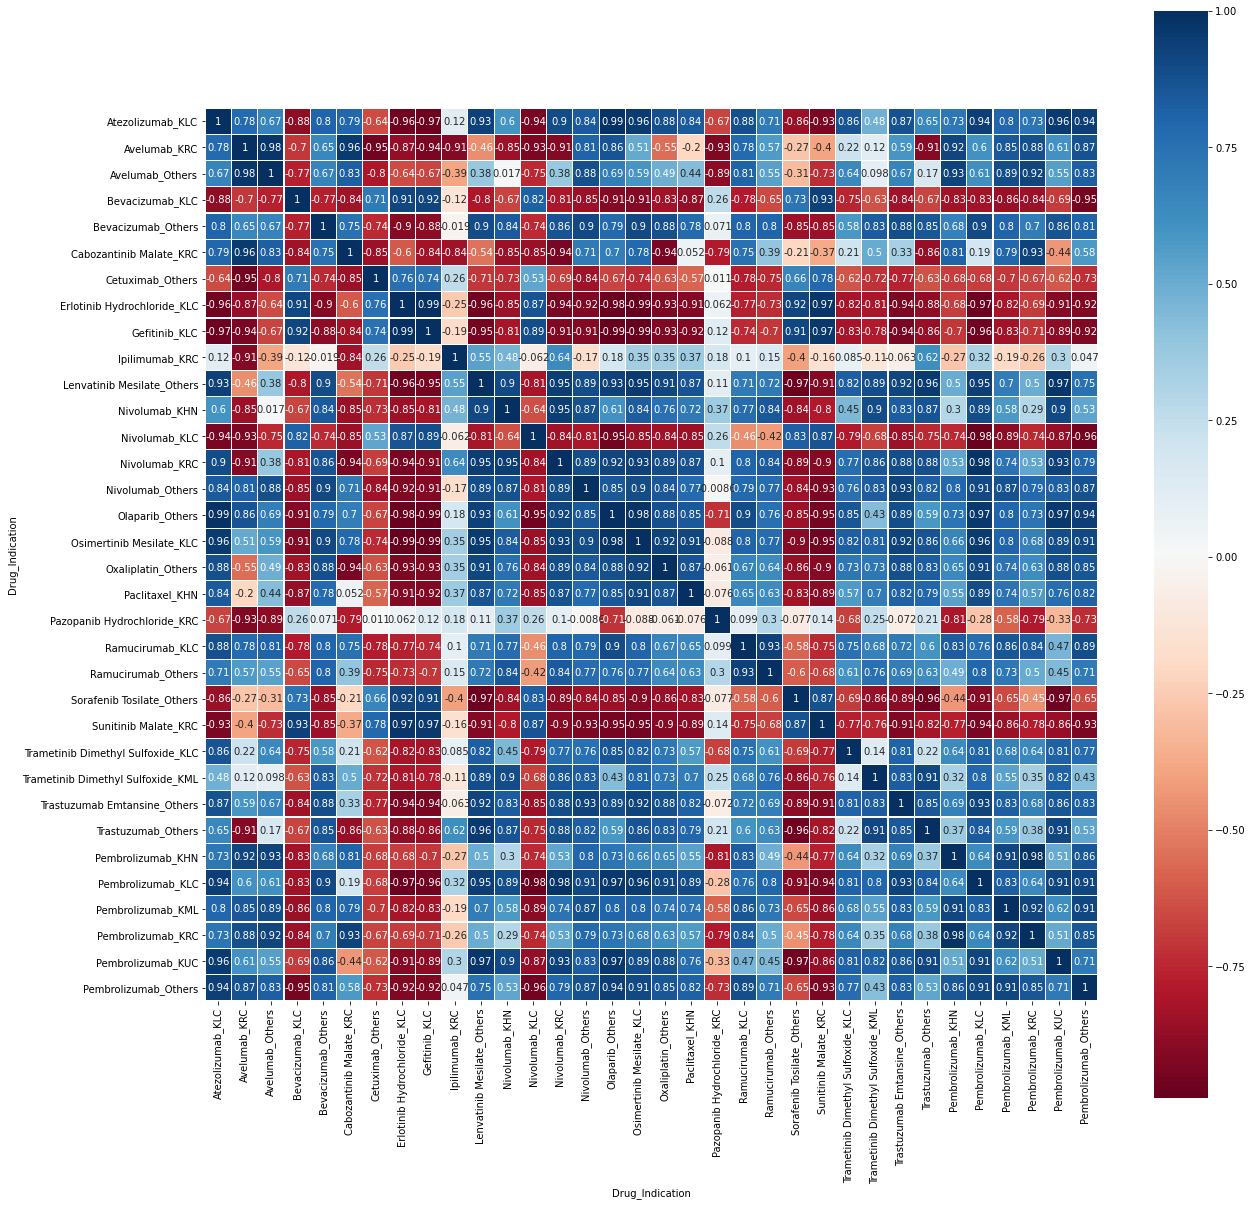

In [29]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
sns.heatmap(df_monthly_patient_count_competitors[high_cor].corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [30]:
df_monthly_patient_count_keytruda = df_monthly_patient_count_competitors[['YM']+[col for col in df_monthly_patient_count_competitors.columns if 'pembro' in col.lower()]]

In [31]:
df_monthly_patient_count_keytruda['total_patients'] = df_monthly_patient_count_keytruda.iloc[:,1:].sum(axis = 1, skipna = True)
df_monthly_patient_count_keytruda

Drug_Indication      YM  Pembrolizumab_KHN  Pembrolizumab_KLC  \
0                201604                NaN                NaN   
1                201605                NaN                NaN   
2                201606                NaN                NaN   
3                201607                NaN                NaN   
4                201608                NaN                NaN   
5                201609                NaN                NaN   
6                201610                NaN                NaN   
7                201611                NaN                NaN   
8                201612                NaN                NaN   
9                201701                NaN                NaN   
10               201702                NaN                2.0   
11               201703                NaN               71.0   
12               201704                0.0              160.0   
13               201705                0.0              227.0   
14               201706                0.0              290.0   
15               201707                0.0              341.0   
16               201708                0.0              378.0   
17               201709                0.0              393.0   
18               201710                0.0              430.0   
19               201711                0.0              426.0   
20               201712                0.0              427.0   
21               201801                0.0              475.0   
22               201802                0.0              500.0   
23               201803                0.0              516.0   
24               201804                0.0              557.0   
25               201805                0.0              591.0   
26               201806                0.0              599.0   
27               201807                0.0              610.0   
28               201808                0.0              654.0   
29               201809                0.0              636.0   
30               201810                0.0              654.0   
31               201811                0.0              685.0   
32               201812                0.0              676.0   
33               201901                0.0              775.0   
34               201902                0.0              838.0   
35               201903                0.0              913.0   
36               201904                0.0              965.0   
37               201905                0.0             1021.0   
38               201906                0.0             1033.0   
39               201907                0.0             1095.0   
40               201908                0.0             1082.0   
41               201909                0.0             1086.0   
42               201910                0.0             1125.0   
43               201911                0.0             1131.0   
44               201912               13.0             1131.0   
45               202001               22.0             1185.0   
46               202002               37.0             1163.0   
47               202003               47.0             1177.0   
48               202004               61.0             1158.0   
49               202005               70.0             1173.0   
50               202006               89.0             1208.0   
51               202007               79.0             1230.0   
52               202008               84.0             1200.0   
53               202009               88.0             1216.0   
54               202010               96.0             1240.0   
55               202011               97.0             1181.0   

Drug_Indication  Pembrolizumab_KML  Pembrolizumab_KRC  Pembrolizumab_KUC  \
0                              NaN                NaN                NaN   
1                              NaN                NaN                NaN   
2                              NaN                NaN             

In [32]:
# df_patient_count_and_launch.to_csv('indication_launch+patients_info.csv',index=False)

#### Creating sales data (keytruda + competitors for target accounts)

In [33]:
df_inhouse_sales = pd.read_excel("S001_Inhouse_Sales_YMD_from_Launch.xlsx",sheet_name='Sheet2')
df_inhouse_sales.drop(columns=['HP_GP_TYPE','Ins_Type','Prod_abbr','Ins_DCF_Code','PROD_FAM_CODE'],inplace=True)
df_inhouse_sales.sort_values(['PROD_NAME_ENG','YM'],inplace = True)
df_inhouse_sales = df_inhouse_sales.reset_index(drop=True)
print(df_inhouse_sales.shape)

df_inhouse_sales_by_account = df_inhouse_sales.groupby(['Ins_Code','PROD_NAME_ENG','YM']).agg({'NHI National Health Insurance (JPY)':'sum',
                                                                 'QTY':'sum'}).reset_index()

(546428, 8)


In [34]:
df_inhouse_sales_by_account_trget = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].groupby('Ins_Code').agg({'NHI National Health Insurance (JPY)':'sum'}).reset_index()
df_inhouse_sales_by_account_trget

Ins_Code  NHI National Health Insurance (JPY)
0      1000001                         4.223230e+08
1      1000011                         1.126512e+08
2      1000021                         1.146593e+09
3      1000031                         2.108046e+08
4      1000040                         3.143635e+08
...        ...                                  ...
1352   2024478                         2.932496e+07
1353   2024527                         5.523438e+06
1354   2024650                         1.250101e+07
1355   2026683                         2.908260e+07
1356   2027022                         1.841532e+07

[1357 rows x 2 columns]

In [35]:
df_inhouse_sales_by_YM = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].groupby('YM').agg({'NHI National Health Insurance (JPY)':'sum','QTY':'sum'}).reset_index()
df_inhouse_sales_by_YM

YM  NHI National Health Insurance (JPY)      QTY
0   201702                         4.701825e+07    114.4
1   201703                         6.345510e+08   1545.6
2   201704                         1.514960e+09   3689.0
3   201705                         2.109301e+09   5137.2
4   201706                         2.740174e+09   6673.4
5   201707                         3.092276e+09   7530.2
6   201708                         3.700607e+09   9012.4
7   201709                         3.521340e+09   8574.8
8   201710                         4.197920e+09  10222.8
9   201711                         4.394170e+09  10701.0
10  201712                         4.686511e+09  11411.4
11  201801                         4.686197e+09  11413.2
12  201802                         5.385852e+09  13116.4
13  201803                         5.428329e+09  13220.2
14  201804                         6.501790e+09  17826.2
15  201805                         6.294440e+09  17258.8
16  201806                         6.468792e+09  17739.2
17  201807                         6.615705e+09  18142.0
18  201808                         7.384187e+09  20250.0
19  201809                         6.273144e+09  17201.8
20  201810                         7.760682e+09  21283.2
21  201811                         7.521468e+09  20625.2
22  201812                         7.786373e+09  21355.6
23  201901                         8.290029e+09  22735.4
24  201902                         8.447986e+09  23170.6
25  201903                         8.145908e+09  22342.0
26  201904                         1.142012e+10  31322.6
27  201905                         9.782138e+09  26829.6
28  201906                         1.040667e+10  28542.6
29  201907                         1.136752e+10  31178.0
30  201908                         1.206721e+10  33097.0
31  201909                         1.387860e+10  38065.0
32  201910                         1.072167e+10  28872.0
33  201911                         1.116612e+10  30069.0
34  201912                         1.264073e+10  34040.0
35  202001                         1.127643e+10  30366.0
36  202002                         1.091866e+10  35655.0
37  202003                         9.986198e+09  32610.0
38  202004                         1.041015e+10  42954.0
39  202005                         7.657696e+09  31597.0
40  202006                         9.816587e+09  40505.0
41  202007                         9.682569e+09  39952.0
42  202008                         9.436578e+09  38937.0
43  202009                         9.514853e+09  39260.0
44  202010                         1.082236e+10  44655.0
45  202011                         9.540798e+09  39367.0
46  202012                         1.066896e+10  44022.0
47  202101                         1.024749e+10  42283.0
48  202102                         6.260258e+09  25831.0

In [36]:
df_YM_sales_patients_keytruda = df_inhouse_sales_by_YM.merge(df_monthly_patient_count_keytruda,on='YM',how='left')

<AxesSubplot:>

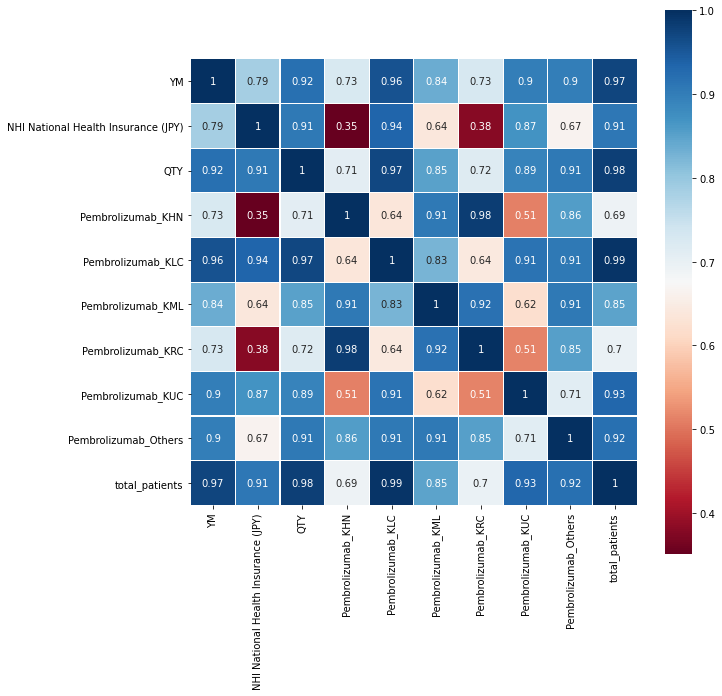

In [37]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(df_YM_sales_patients_keytruda.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [38]:
# here we see that total patients are correlated with QTY by 0.98
# also, patients in KLC is correlated with total patients by 0.99 , this is good as we are starting our base modeling using KLC by approach 1

In [39]:
# hospital_type_mapping = {'Pharmacy': 'Pharmacy', 'GP': ['Doctors Association', 'Hospital/Clinic', 'Others'] , 
#                          'HP': ['Major Hospital (>500 bed)', 'Mid-sized Hospital (200~499 Beds)', 'University Hospital']
#                         }

In [40]:
df_trgt = pd.read_excel("N001_Ins_Master.xlsx",usecols=[i for i in range(39) if i not in (1,2,3,4,6,8,10,12,14,16,17,18)])
df_trgt =df_trgt.dropna(subset=['KLC_TGT', 'KUC_TGT', 'KRC_TGT', 'KHN_TGT', 'KML_TGT', 'KHL_TGT', 'KMS_TGT', 'KES_TGT',
                           'KX_TGT'], how='all')
df_trgt.Ins_Code = df_trgt.Ins_Code.astype(int)
df_trgt.shape

# print("Keytruda unique accounts for which we have target flags:",len(set(df_trgt['Ins_Code'])))
# print("Keytruda unique accounts for which have Sales (Yen) >0 from 201702:",len(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code'])))
# print("Keytruda Target Accounts:",len(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code']).intersection(set(df_trgt['Ins_Code']))))

print("Keytruda unique accounts for which we have target flags:",len(set(df_trgt['Ins_Code'])))
print("Keytruda unique accounts for which have Sales from 201702:",len(set(df_inhouse_sales_by_account_trget['Ins_Code'])))
print("Keytruda Target Accounts:",len(set(df_inhouse_sales_by_account_trget['Ins_Code']).intersection(set(df_trgt['Ins_Code']))))

# target_acc = pd.DataFrame()
# target_acc['target_accounts'] = list(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code']).intersection(set(df_trgt['Ins_Code'])))
# target_acc.to_csv('target_accounts.csv',index=False)

target_acc = pd.DataFrame()
target_acc['target_accounts'] = list(set(df_inhouse_sales_by_account_trget['Ins_Code']).intersection(set(df_trgt['Ins_Code'])))
target_acc.to_csv('target_accounts.csv',index=False)

# non_target_acc = pd.DataFrame()
# non_target_acc['non_target_accounts'] = list(set(df_inhouse_sales_by_account_trget[df_inhouse_sales_by_account_trget['NHI National Health Insurance (JPY)']>0]['Ins_Code']).difference(set(df_trgt['Ins_Code'])))
# non_target_acc.to_csv('non_target_accounts.csv',index=False)

non_target_acc = pd.DataFrame()
non_target_acc['non_target_accounts'] = list(set(df_inhouse_sales_by_account_trget['Ins_Code']).difference(set(df_trgt['Ins_Code'])))
non_target_acc.to_csv('non_target_accounts.csv',index=False)

target_acc_sales = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'][df_inhouse_sales_by_account['Ins_Code'].isin(list(target_acc['target_accounts']))]['NHI National Health Insurance (JPY)'].sum()

nontarget_acc_sales = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'][df_inhouse_sales_by_account['Ins_Code'].isin(list(non_target_acc['non_target_accounts']))]['NHI National Health Insurance (JPY)'].sum()

print(nontarget_acc_sales/target_acc_sales)
print(nontarget_acc_sales/(target_acc_sales+nontarget_acc_sales))
print(target_acc_sales/(target_acc_sales+nontarget_acc_sales))

df_inhouse_sales_by_account = df_inhouse_sales_by_account[df_inhouse_sales_by_account['Ins_Code'].isin(list(target_acc['target_accounts']))]

KeyboardInterrupt: 

In [ ]:
df_inhouse_sales_by_account

In [ ]:
# df_inhouse_sales_by_account.to_csv('inhouse_sales_for_target_accounts.csv',index=False)

In [ ]:
df_target_inhouse_sales_by_YM = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].groupby('YM').agg({'NHI National Health Insurance (JPY)':'sum','QTY':'sum'}).reset_index()
df_target_inhouse_sales_by_YM

In [ ]:
df_target_YM_sales_patients_keytruda = df_target_inhouse_sales_by_YM.merge(df_monthly_patient_count_keytruda,on='YM',how='left')

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(df_target_YM_sales_patients_keytruda.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

#### DDD sales

In [ ]:
df_market_sales_from_201804 = pd.read_csv("S002_Market_Sales_from_201804.csv", encoding= 'ansi')
df_market_sales_from_201804.drop(columns=['BRICK_NAME','Ins_DCF_Code','Ins_Name_abbr','ATC3_CODE','ATC3_NAME',
                                         'PROD3_CODE','PROD3_NAME','ATC3_NAME_ENG','PROD_oldest_data_month'],inplace=True)

df_DDD = df_market_sales_from_201804[df_market_sales_from_201804['Ins_Code'].notnull()]
df_DDD = df_DDD[df_DDD['Ins_Code'].isin(list(target_acc['target_accounts']))]
print(df_DDD.shape, len(set(df_DDD.Ins_Code)))

In [ ]:
df_DDD.YM.min(), df_DDD.YM.max()

In [ ]:
# df_DDD.to_csv('market_sales_for_target_accounts.csv',index=False)

In [ ]:
print(df_DDD.shape)
print(df_DDD.isnull().sum())
print(df_DDD.nunique())
print(df_DDD.PROD3_NAME_ENG.unique())

In [ ]:
df_DDD

In [ ]:
df_DDD.PROD3_NAME_ENG.unique()

In [ ]:
# df_DDD = df_DDD[df_DDD['PROD3_NAME_ENG']!='5 FU KYOWA KIRIN'].reset_index(drop=True)
# df_DDD

In [ ]:
# df_DDD[df_DDD.duplicated(['INS_YM','PROD3_NAME_ENG'],keep=False)].sort_values(['INS_YM','PROD3_NAME_ENG'])['PROD3_NAME_ENG'].unique()

In [ ]:
df_DDD_YM_competitor_sales = df_DDD.groupby(['PROD3_NAME_ENG','YM']).agg({'YEN':'sum'}).reset_index().pivot(index='YM',columns='PROD3_NAME_ENG',values='YEN').reset_index()
df_DDD_YM_competitor_sales

In [ ]:
df_DDD_YM_competitor_sales['total_sales'] = df_DDD_YM_competitor_sales.iloc[:,2:].sum(axis = 1, skipna = True)
df_DDD_YM_competitor_sales

In [ ]:
# df_DDD_YM_competitor_sales_key_opd = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower() or 'opdivo' in col.lower() or 'total' in col.lower() or 'TECENTRIQ' in col.upper()]]
# df_DDD_YM_competitor_sales_key_opd['KEYTRUDA/total'] = df_DDD_YM_competitor_sales_key_opd['KEYTRUDA'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd['OPDIVO/total'] = df_DDD_YM_competitor_sales_key_opd['OPDIVO'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd['TECENTRIQ/total'] = df_DDD_YM_competitor_sales_key_opd['TECENTRIQ'] / df_DDD_YM_competitor_sales_key_opd['total_sales']

In [ ]:
# df_DDD_YM_competitor_sales.columns

In [ ]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(10,10))
# sns.heatmap(df_DDD_YM_competitor_sales_key_opd.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
# df_DDD_YM_competitor_sales = df_DDD.pivot(index='INS_YM',columns='PROD3_NAME_ENG',values='YEN').reset_index()
# df_DDD_YM_competitor_sales['total_sales'] = df_DDD_YM_competitor_sales.iloc[:,2:].sum(axis = 1, skipna = True)
# df_DDD_YM_competitor_sales_key_opd = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower() or 'opdivo' in col.lower() or 'total' in col.lower()]]
# df_DDD_YM_competitor_sales_key_opd['KEYTRUDA/total'] = df_DDD_YM_competitor_sales_key_opd['KEYTRUDA'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd['OPDIVO/total'] = df_DDD_YM_competitor_sales_key_opd['OPDIVO'] / df_DDD_YM_competitor_sales_key_opd['total_sales']
# df_DDD_YM_competitor_sales_key_opd

In [ ]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(10,10))
# sns.heatmap(df_DDD_YM_competitor_sales_key_opd.corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower() or 'opdivo' in col.lower()]]

In [ ]:
#ketruda sales / total for all competitors
#Opdivo sales/ total sales

In [ ]:
df_DDD_YM_competitor_sales = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' not in col.lower()] + [col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower()]]

In [ ]:
df_DDD[df_DDD['BRICK_CODE']==4310103112][df_DDD['PROD3_NAME_ENG']=='KEYTRUDA']

In [ ]:
df_brick_acc_dup = df_DDD.groupby('BRICK_CODE').agg({'Ins_Code':'nunique'}).reset_index()
df_brick_acc_dup

In [ ]:
df_brick_acc_dup[df_brick_acc_dup['Ins_Code']>1]

In [ ]:
df_DDD_YM_competitor_sales = df_DDD.groupby(['PROD3_NAME_ENG','YM']).agg({'YEN':'sum'}).reset_index().pivot(index='YM',columns='PROD3_NAME_ENG',values='YEN').reset_index()
df_DDD_YM_competitor_sales = df_DDD_YM_competitor_sales[[col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' not in col.lower()] + [col for col in df_DDD_YM_competitor_sales.columns if 'keytruda' in col.lower()]]

In [ ]:
df_DDD_YM_competitor_sales_final = df_DDD_YM_competitor_sales.dropna(axis=1,thresh=17)
df_DDD_YM_competitor_sales.shape[1], df_DDD_YM_competitor_sales_final.shape[1]

In [ ]:
print(df_DDD_YM_competitor_sales_final.shape)
df1 = df_DDD_YM_competitor_sales_final.copy()
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
high_cor = [column for column in upper.columns if (any(upper[column] > 0.7) or any(upper[column] < -0.7))]
print(len(high_cor))
print(high_cor)

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(35,35))
sns.heatmap(df_DDD_YM_competitor_sales_final[high_cor].corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
df_target_YM_sales_patients_keytruda_ddd_inhouse_comp = df_target_YM_sales_patients_keytruda.merge(df_DDD_YM_competitor_sales_final[['YM','KEYTRUDA']],on='YM',how='left')
df_target_YM_sales_patients_keytruda_ddd_inhouse_comp

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,8))
sns.heatmap(df_target_YM_sales_patients_keytruda.merge(df_DDD_YM_competitor_sales_final[['YM','KEYTRUDA']],on='YM',how='left').corr(),linewidths=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
df_DDD_YM_competitor_sales_final

In [ ]:
### overlapping correlations - 

In [ ]:
#### 

#### Final Data Preparation

In [ ]:
df_inhouse_sales_by_account

In [ ]:
df_inhouse_sales = df_inhouse_sales_by_account[df_inhouse_sales_by_account['PROD_NAME_ENG']=='Keytruda'].pivot_table(
        index=['Ins_Code', 'YM'], 
         columns='PROD_NAME_ENG', 
         values=['QTY','NHI National Health Insurance (JPY)']
).reset_index()

df_inhouse_sales.columns = list(map("_".join, df_inhouse_sales.columns))
df_inhouse_sales.rename(columns={'Ins_Code_':'Ins_Code','YM_':'YM'},inplace=True)

In [ ]:
df_inhouse_sales.isnull().sum()

In [ ]:
df_mdv_indication[df_mdv_indication['Drug']=='Pembrolizumab']

In [ ]:
keytruda_indication_launch_dict = dict(zip(df_mdv_indication[df_mdv_indication['Drug']=='Pembrolizumab'].Indication, 
                     df_mdv_indication[df_mdv_indication['Drug']=='Pembrolizumab'].Launch_month))
keytruda_indication_launch_dict

In [ ]:
df_trgt.head()

In [ ]:
df_inhouse_sales['KML_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KML'],1,0)
df_inhouse_sales['KLC_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KLC'],1,0)
df_inhouse_sales['Hodgkin_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['Hodgkin'],1,0)
df_inhouse_sales['KUC_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KUC'],1,0)
df_inhouse_sales['MSI_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['MSI-H'],1,0)
df_inhouse_sales['KRC_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KRC'],1,0)
df_inhouse_sales['KHN_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KHN'],1,0)

In [ ]:
df_inhouse_sales = df_inhouse_sales.merge(df_trgt[['Ins_Code','KLC_TGT','KUC_TGT','KRC_TGT','KHN_TGT','KML_TGT',
                                                  'KHL_TGT','KMS_TGT','KES_TGT','KX_TGT']].fillna(0),
                      on='Ins_Code',how='left')

In [ ]:
df_inhouse_sales = df_inhouse_sales.sort_values(['Ins_Code','YM']).reset_index(drop=True)
df_inhouse_sales

In [ ]:
# df_inhouse_sales = df_inhouse_sales.merge(df_trgt[['Ins_Code','HP_GP_TYPE (english)']], on='Ins_Code',how='left')
# df_inhouse_sales

In [ ]:
df_inhouse_sales['YM'].min(),df_inhouse_sales['YM'].max()

In [ ]:
df_inhouse_sales

In [ ]:
df_inhouse_sales['Keytruda_KML_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KML'],np.nan,0)
df_inhouse_sales['Keytruda_KLC_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KLC'],np.nan,0)
df_inhouse_sales['Keytruda_KUC_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KUC'],np.nan,0)
df_inhouse_sales['Keytruda_KRC_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KRC'],np.nan,0)
df_inhouse_sales['Keytruda_KHN_QTY'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['KHN'],np.nan,0)
df_inhouse_sales['Keytruda_Others_QTY'] = np.nan

# df_inhouse_sales['Hodgkin_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['Hodgkin'],1,0)
# df_inhouse_sales['MSI_launched'] = np.where(df_inhouse_sales['YM']>=keytruda_indication_launch_dict['MSI-H'],1,0)

In [ ]:
print(df_inhouse_sales.shape)
df_inhouse_sales.isnull().sum()

In [ ]:
df_inhouse_sales

In [ ]:
## generating target variables for KML
filter_for_kml_sales = (df_inhouse_sales['Hodgkin_launched']==0) & (df_inhouse_sales['KUC_launched']==0) & \
                 (df_inhouse_sales['MSI_launched']==0) & (df_inhouse_sales['KRC_launched']==0) & \
                 (df_inhouse_sales['KHN_launched']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KML_TGT']==1) & (df_inhouse_sales['Keytruda_KML_QTY']!=0)
df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'])
display(df_inhouse_sales.loc[filter_for_kml_sales,'QTY_Keytruda'])

In [ ]:
## generating target variables for KLC
filter_for_klc_sales = (df_inhouse_sales['Hodgkin_launched']==0) & (df_inhouse_sales['KUC_launched']==0) & \
                 (df_inhouse_sales['MSI_launched']==0) & (df_inhouse_sales['KRC_launched']==0) & \
                 (df_inhouse_sales['KHN_launched']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==1) & (df_inhouse_sales['Keytruda_KLC_QTY']!=0)
df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'])
display(df_inhouse_sales.loc[filter_for_klc_sales,'QTY_Keytruda'])

In [ ]:
df_inhouse_sales.isnull().sum()

In [ ]:
## generating target variables for KUC
filter_for_kuc_sales = (df_inhouse_sales['MSI_launched']==0) & (df_inhouse_sales['KRC_launched']==0) & \
                 (df_inhouse_sales['KHN_launched']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==1) & (df_inhouse_sales['Keytruda_KUC_QTY']!=0)
df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'])
display(df_inhouse_sales.loc[filter_for_kuc_sales,'QTY_Keytruda'])

In [ ]:
df_inhouse_sales

In [ ]:
## generating target variables for KRC
filter_for_krc_sales = (df_inhouse_sales['KML_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KHN_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KRC_QTY']!=0)
df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'])
display(df_inhouse_sales.loc[filter_for_krc_sales,'QTY_Keytruda'])

In [ ]:
## generating target variables for KHN
filter_for_khn_sales = (df_inhouse_sales['KML_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KHN_QTY']!=0)
df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'])
display(df_inhouse_sales.loc[filter_for_khn_sales,'QTY_Keytruda'])

In [ ]:
### Filling based on only Target Flags

In [ ]:
## generating target variables for KML again
filter_for_kml_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KML_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KML_QTY']!=0)
df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kml_sales,'Keytruda_KML_QTY'])
display(df_inhouse_sales.loc[filter_for_kml_sales,'QTY_Keytruda'])

In [ ]:
## generating target variables for KLC again
filter_for_klc_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KLC_QTY']!=0)
df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_klc_sales,'Keytruda_KLC_QTY'])
display(df_inhouse_sales.loc[filter_for_klc_sales,'QTY_Keytruda'])

In [ ]:
## generating target variables for KUC again
filter_for_kuc_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KLC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KUC_QTY']!=0)
df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_kuc_sales,'Keytruda_KUC_QTY'])
display(df_inhouse_sales.loc[filter_for_kuc_sales,'QTY_Keytruda'])

In [ ]:
## generating target variables for KRC again
filter_for_krc_sales = (df_inhouse_sales['KHN_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KRC_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KRC_QTY']!=0)
df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_krc_sales,'Keytruda_KRC_QTY'])
display(df_inhouse_sales.loc[filter_for_krc_sales,'QTY_Keytruda'])

In [ ]:
## generating target variables for KHN again
filter_for_khn_sales = (df_inhouse_sales['KLC_TGT']==0) & (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['KUC_TGT']==0) & (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['KHL_TGT']==0) & (df_inhouse_sales['KMS_TGT']==0) & \
                 (df_inhouse_sales['KES_TGT']==0) & (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['KHN_TGT']==1) & \
                 (df_inhouse_sales['Keytruda_KHN_QTY']!=0)
df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_khn_sales,'Keytruda_KHN_QTY'])
display(df_inhouse_sales.loc[filter_for_khn_sales,'QTY_Keytruda'])

In [ ]:
df_inhouse_sales

In [ ]:
print(df_inhouse_sales.shape)
df_inhouse_sales.isnull().sum()

In [ ]:
# ### initial number:

# Keytruda_KML_QTY                                37774
# Keytruda_KLC_QTY                                37774
# Keytruda_KUC_QTY                                32463
# Keytruda_KRC_QTY                                13138
# Keytruda_KHN_QTY                                13138

In [ ]:
df_inhouse_sales[df_inhouse_sales['Keytruda_KLC_QTY'].notnull()]

In [ ]:
df_inhouse_sales[df_inhouse_sales['Keytruda_KLC_QTY'].notnull()]['Ins_Code'].nunique()

In [ ]:
### added today:
## generating target variables for KML again
filter_for_kml_0_tgt = (df_inhouse_sales['KML_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KML_QTY']!=0)
df_inhouse_sales.loc[filter_for_kml_0_tgt,'Keytruda_KML_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_kml_0_tgt,'Keytruda_KML_QTY'])

In [ ]:
## generating target variables for KLC again
filter_for_klc_0_tgt = (df_inhouse_sales['KLC_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KLC_QTY']!=0)
df_inhouse_sales.loc[filter_for_klc_0_tgt,'Keytruda_KLC_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_klc_0_tgt,'Keytruda_KLC_QTY'])

In [ ]:
## generating target variables for KUC again
filter_for_kuc_0_tgt = (df_inhouse_sales['KUC_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KUC_QTY']!=0)
df_inhouse_sales.loc[filter_for_kuc_0_tgt,'Keytruda_KUC_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_kuc_0_tgt,'Keytruda_KUC_QTY'])

In [ ]:
## generating target variables for KRC again
filter_for_krc_0_tgt = (df_inhouse_sales['KRC_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KRC_QTY']!=0)
df_inhouse_sales.loc[filter_for_krc_0_tgt,'Keytruda_KRC_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_krc_0_tgt,'Keytruda_KRC_QTY'])

In [ ]:
## generating target variables for KHN again
filter_for_khn_0_tgt = (df_inhouse_sales['KHN_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_KHN_QTY']!=0)
df_inhouse_sales.loc[filter_for_khn_0_tgt,'Keytruda_KHN_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_khn_0_tgt,'Keytruda_KHN_QTY'])

In [ ]:
## generating target variables for Others 

In [ ]:
filter_for_others_0_tgt = (df_inhouse_sales['KML_TGT']==0) & \
                        (df_inhouse_sales['KLC_TGT']==0) & \
                        (df_inhouse_sales['KUC_TGT']==0) & \
                        (df_inhouse_sales['KRC_TGT']==0) & \
                        (df_inhouse_sales['KHN_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_Others_QTY']!=0)
df_inhouse_sales.loc[filter_for_others_0_tgt,'Keytruda_Others_QTY'] = df_inhouse_sales['QTY_Keytruda']
display(df_inhouse_sales.loc[filter_for_others_0_tgt,'Keytruda_Others_QTY'])

In [ ]:
filter_for_others_1_tgt = (df_inhouse_sales['KHL_TGT']==0) & \
                        (df_inhouse_sales['KMS_TGT']==0) & \
                        (df_inhouse_sales['KES_TGT']==0) & \
                        (df_inhouse_sales['KX_TGT']==0) & \
                 (df_inhouse_sales['Keytruda_Others_QTY']!=0)
df_inhouse_sales.loc[filter_for_others_1_tgt,'Keytruda_Others_QTY'] = 0
display(df_inhouse_sales.loc[filter_for_others_1_tgt,'Keytruda_Others_QTY'])

In [ ]:
df_inhouse_sales.isnull().sum()

In [ ]:
# ## numbers before today
# Keytruda_KML_QTY                                37743
# Keytruda_KLC_QTY                                34161
# Keytruda_KUC_QTY                                32074
# Keytruda_KRC_QTY                                13104
# Keytruda_KHN_QTY                                13138
# Keytruda_Others_QTY                             37774

### Preparing Data for Optimization

In [ ]:
df_inhouse_sales

In [ ]:
df_inhouse_sales.columns

In [ ]:
df_inhouse_sales.rename(columns={'NHI National Health Insurance (JPY)_Keytruda':'inhouse_keytruda_sales_YEN', 'QTY_Keytruda':'inhouse_keytruda_sales_QTY'},inplace=True)

In [ ]:
df_inhouse_sales

In [ ]:
df_inhouse_sales[['Ins_Code','YM','Keytruda_KML_QTY','Keytruda_KLC_QTY','Keytruda_KUC_QTY','Keytruda_KRC_QTY','Keytruda_KHN_QTY','Keytruda_Others_QTY']]

In [ ]:
df_optimization = pd.melt(df_inhouse_sales[['Ins_Code','YM','Keytruda_KML_QTY','Keytruda_KLC_QTY','Keytruda_KUC_QTY',
                          'Keytruda_KRC_QTY','Keytruda_KHN_QTY','Keytruda_Others_QTY']],
        id_vars=['Ins_Code', 'YM'], var_name='Indication', value_name='value').sort_values(['Ins_Code','YM']).reset_index(drop=True)
df_optimization

In [ ]:
df_optimization[df_optimization['Indication']=='Keytruda_KML_QTY'].isnull().sum()

In [ ]:
df_optimization.isnull().sum()

In [ ]:
df_optimization1 = df_optimization.merge(df_inhouse_sales[['Ins_Code','YM','inhouse_keytruda_sales_YEN','inhouse_keytruda_sales_QTY']],
                      on = ['Ins_Code','YM'], how='left')
df_optimization1

In [ ]:
df_optimization1['Indication'].unique()

In [ ]:
df_optimization1['Indication'] = df_optimization1['Indication'].replace({'Keytruda_KML_QTY':'KML', 'Keytruda_KLC_QTY':'KLC', 'Keytruda_KUC_QTY':'KUC',
       'Keytruda_KRC_QTY':'KRC', 'Keytruda_KHN_QTY':'KHN', 'Keytruda_Others_QTY':'Others'})

In [ ]:
df_optimization1['Indication'].unique()

In [ ]:
df_optimization1['is_sales_available_for_indication'] = np.where(df_optimization1['value'].notnull(), 1, 0)

In [ ]:
df_optimization1['dummy_var2'] = [1,0,0,0,0,0]*int(df_optimization1.shape[0]/6)
df_optimization1

In [ ]:
df_optimization1['YM'].unique()

In [ ]:
df_optimization1[df_optimization1['YM']==201709]

In [ ]:
# var_month = []
# for i in range(5):
#     var_month.append(x[i])
# print(np.sum(var_month))

In [ ]:
# np.sum(var_month)

In [ ]:
# df_opt = df_optimization1[df_optimization1['Ins_Code'].isin(list(df_optimization1['Ins_Code'].unique())[:1])].copy()
# array_of_sales = np.array(df_opt['inhouse_keytruda_sales_QTY']*df_opt['dummy_var2'])
# array_of_indication_wise_sales = df_opt['value'].values

# for i in list(df_opt['YM'].unique()[:1]):
#     var_month = []
#     var_month_sales = []
#     for j in list(df_opt[df_opt['YM']==i].index):
#         var_month.append(x[j])
#         var_month_sales.append(array_of_sales[j])
#         sales_for_a_month_across_all_accts = np.sum(var_month_sales)
#     print(np.sum(var_month)-( sales_for_a_month_across_all_accts- sales_for_a_month_across_all_accts*alpha_tolerance ))
#     print((sales_for_a_month_across_all_accts + sales_for_a_month_across_all_accts*alpha_tolerance) - np.sum(var_month))

In [ ]:
df_optimization1[df_optimization1['inhouse_keytruda_sales_QTY'].between(2.1, 2.9, inclusive=True)]

### Setting up Scipy

In [367]:
df_opt = df_optimization1[df_optimization1['Ins_Code'].isin(list(df_optimization1['Ins_Code'].unique())[:1])].copy()
df_opt

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0     1000001  201709        KML    NaN                    821082.0   
1     1000001  201709        KLC    NaN                    821082.0   
2     1000001  201709        KUC    0.0                    821082.0   
3     1000001  201709        KRC    0.0                    821082.0   
4     1000001  201709        KHN    0.0                    821082.0   
..        ...     ...        ...    ...                         ...   
247   1000001  202102        KLC    NaN                   6301230.0   
248   1000001  202102        KUC    NaN                   6301230.0   
249   1000001  202102        KRC    NaN                   6301230.0   
250   1000001  202102        KHN    NaN                   6301230.0   
251   1000001  202102     Others    NaN                   6301230.0   

     inhouse_keytruda_sales_QTY  is_sales_available_for_indication  dummy_var2  
0                           2.0                                  0           1  
1                           2.0                                  0           0  
2                           2.0                                  1           0  
3                           2.0                                  1           0  
4                           2.0                                  1           0  
..                          ...                                ...         ...  
247                        26.0                                  0           0  
248                        26.0                                  0           0  
249                        26.0                                  0           0  
250                        26.0                                  0           0  
251                        26.0                                  0           0  

[252 rows x 8 columns]

In [368]:
df_opt = df_opt.merge(df_patient_count_and_launch[df_patient_count_and_launch['Drug']=='Pembrolizumab'].reset_index(drop=True)[['Indication','YM','number_of_patients']],
            on=['Indication','YM'],how='left')

df_agg_patient = df_opt[df_opt['number_of_patients'].notnull()].groupby(['YM']).agg({'number_of_patients':np.sum}).reset_index().rename(columns={'number_of_patients':'agg_number_of_patients'})
df_opt = df_opt.merge(df_agg_patient, on=['YM'], how='left')
# df_opt = df_opt.sort_values(['YM','Indication'])
df_opt

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0     1000001  201709        KML    NaN                    821082.0   
1     1000001  201709        KLC    NaN                    821082.0   
2     1000001  201709        KUC    0.0                    821082.0   
3     1000001  201709        KRC    0.0                    821082.0   
4     1000001  201709        KHN    0.0                    821082.0   
..        ...     ...        ...    ...                         ...   
247   1000001  202102        KLC    NaN                   6301230.0   
248   1000001  202102        KUC    NaN                   6301230.0   
249   1000001  202102        KRC    NaN                   6301230.0   
250   1000001  202102        KHN    NaN                   6301230.0   
251   1000001  202102     Others    NaN                   6301230.0   

     inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
0                           2.0                                  0   
1                           2.0                                  0   
2                           2.0                                  1   
3                           2.0                                  1   
4                           2.0                                  1   
..                          ...                                ...   
247                        26.0                                  0   
248                        26.0                                  0   
249                        26.0                                  0   
250                        26.0                                  0   
251                        26.0                                  0   

     dummy_var2  number_of_patients  agg_number_of_patients  
0             1                16.0                   409.0  
1             0               393.0                   409.0  
2             0                 0.0                   409.0  
3             0                 0.0                   409.0  
4             0                 0.0                   409.0  
..          ...                 ...                     ...  
247           0                 NaN                     NaN  
248           0                 NaN                     NaN  
249           0                 NaN                     NaN  
250           0                 NaN                     NaN  
251           0                 NaN                     NaN  

[252 rows x 10 columns]

In [370]:
# df_opt.to_csv("QC1.csv",index=False)

In [359]:
array_of_sales = np.array(df_opt['inhouse_keytruda_sales_QTY']*df_opt['dummy_var2'])
array_of_sales

array([ 2. ,  0. ,  0. ,  0. ,  0. ,  0. ,  2. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  5.2,  0. ,  0. ,  0. ,  0. ,  0. ,  5.2,  0. ,  0. ,  0. ,
        0. ,  0. ,  7.2,  0. ,  0. ,  0. ,  0. ,  0. ,  6. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  6.4,  0. ,  0. ,  0. ,  0. ,  0. , 14.6,  0. ,
        0. ,  0. ,  0. ,  0. , 18.6,  0. ,  0. ,  0. ,  0. ,  0. , 19.4,
        0. ,  0. ,  0. ,  0. ,  0. , 25.2,  0. ,  0. ,  0. ,  0. ,  0. ,
       26.6,  0. ,  0. ,  0. ,  0. ,  0. , 19.8,  0. ,  0. ,  0. ,  0. ,
        0. , 26.6,  0. ,  0. ,  0. ,  0. ,  0. , 24.4,  0. ,  0. ,  0. ,
        0. ,  0. , 29.2,  0. ,  0. ,  0. ,  0. ,  0. , 41.2,  0. ,  0. ,
        0. ,  0. ,  0. , 32. ,  0. ,  0. ,  0. ,  0. ,  0. , 30. ,  0. ,
        0. ,  0. ,  0. ,  0. , 50. ,  0. ,  0. ,  0. ,  0. ,  0. , 42. ,
        0. ,  0. ,  0. ,  0. ,  0. , 54. ,  0. ,  0. ,  0. ,  0. ,  0. ,
       34. ,  0. ,  0. ,  0. ,  0. ,  0. , 46. ,  0. ,  0. ,  0. ,  0. ,
        0. , 44. ,  0. ,  0. ,  0. ,  0. ,  0. , 58

In [360]:
len(array_of_sales)

252

In [361]:
np.array(df_opt['agg_number_of_patients']*df_opt['dummy_var2'])

array([ 409.,    0.,    0.,    0.,    0.,    0.,  447.,    0.,    0.,
          0.,    0.,    0.,  440.,    0.,    0.,    0.,    0.,    0.,
        445.,    0.,    0.,    0.,    0.,    0.,  522.,    0.,    0.,
          0.,    0.,    0.,  593.,    0.,    0.,    0.,    0.,    0.,
        645.,    0.,    0.,    0.,    0.,    0.,  733.,    0.,    0.,
          0.,    0.,    0.,  807.,    0.,    0.,    0.,    0.,    0.,
        827.,    0.,    0.,    0.,    0.,    0.,  837.,    0.,    0.,
          0.,    0.,    0.,  906.,    0.,    0.,    0.,    0.,    0.,
        882.,    0.,    0.,    0.,    0.,    0.,  919.,    0.,    0.,
          0.,    0.,    0.,  987.,    0.,    0.,    0.,    0.,    0.,
        978.,    0.,    0.,    0.,    0.,    0., 1094.,    0.,    0.,
          0.,    0.,    0., 1172.,    0.,    0.,    0.,    0.,    0.,
       1247.,    0.,    0.,    0.,    0.,    0., 1313.,    0.,    0.,
          0.,    0.,    0., 1400.,    0.,    0.,    0.,    0.,    0.,
       1426.,    0.,

In [362]:
len(np.array(df_opt['agg_number_of_patients']*df_opt['dummy_var2']))

252

In [363]:
list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]
list_of_ym_ind_patients = [np.sum(array_of_ym_ind_patients[i:i+6]) for i in range(0,len(array_of_ym_ind_patients),6)]
# list_of_x = [np.sum(x[i:(i+6)]) for i in range(0,len(x),6)]
bad = ~np.logical_or(np.isnan(list_of_keytruda_sales), np.isnan(list_of_ym_ind_patients))
list_of_keytruda_sales = np.compress(bad, list_of_keytruda_sales)
list_of_ym_ind_patients = np.compress(bad, list_of_ym_ind_patients)
# list_of_x = np.compress(bad, list_of_x)
corr_value = np.corrcoef(list_of_keytruda_sales,list_of_ym_ind_patients)[1,0]
# corr_x = np.corrcoef(list_of_x,list_of_ym_ind_patients)[1,0]

In [364]:
corr_value

0.8440821796242894

In [365]:
print(list_of_keytruda_sales)
print(len(list_of_keytruda_sales))

print(list_of_ym_ind_patients)
print(len(list_of_ym_ind_patients))

[ 2.   2.   5.2  5.2  7.2  6.   6.4 14.6 18.6 19.4 25.2 26.6 19.8 26.6
 24.4 29.2 41.2 32.  30.  50.  42.  54.  34.  46.  44.  58.  44.  38.
 42.  34.  30.  42.  38.  40.  32.  32.  36.  54.  56. ]
39
[ 409.  447.  440.  445.  522.  593.  645.  733.  807.  827.  837.  906.
  882.  919.  987.  978. 1094. 1172. 1247. 1313. 1400. 1426. 1493. 1454.
 1460. 1536. 1539. 1569. 1636. 1623. 1690. 1706. 1747. 1823. 1834. 1804.
 1824. 1894. 1815.]
39


NameError: name 'df_opt' is not defined

In [ ]:
###################### Importing required libraries ######################
import numpy as np
from scipy.optimize import minimize
from scipy.stats import pearsonr, spearmanr
import random
random.seed(1)

###################### Defining some variables to be used for optimization ######################
## subset the original optimization data frame for some accounts
df_opt = df_optimization1[df_optimization1['Ins_Code'].isin(list(df_optimization1['Ins_Code'].unique())[:1])].copy()
## adding column for competitor sales
df_opt = df_opt.merge(df_DDD_keytruda_competitors[['Ins_Code','YM','OPDIVO']], on=['Ins_Code','YM'], how='left')
## adding columns for indicationwise, monthly patient counts from tumortype data
df_opt = df_opt.merge(df_patient_count_and_launch[df_patient_count_and_launch['Drug']=='Pembrolizumab'].reset_index(drop=True)[['Indication','YM','number_of_patients']],
            on=['Indication','YM'],how='left')

df_agg_patient = df_opt[df_opt['number_of_patients'].notnull()].groupby(['YM']).agg({'number_of_patients':np.sum}).reset_index().rename(columns={'number_of_patients':'agg_number_of_patients'})
df_opt = df_opt.merge(df_agg_patient, on=['YM'], how='left')
# df_opt = df_opt.sort_values(['YM','Indication'])

### creating variables for preprocessing
array_of_sales = np.array(df_opt['inhouse_keytruda_sales_QTY']*df_opt['dummy_var2'])
array_of_indication_wise_sales = df_opt['value'].values
array_of_sales_opdivo = np.array(df_opt['OPDIVO']*df_opt['dummy_var2'])
array_of_ym_ind_patients = np.array(df_opt['agg_number_of_patients']*df_opt['dummy_var2'])

print(df_opt.shape)

print(f"Optimizing for {df_opt.shape[0]} decision variables")
print("Optimization begins.....")

###################### Defining Objective Function ######################
def objective(x):
    return (np.sum(x)-np.sum(array_of_sales))
#         return np.sum((x-array_of_sales)**2)
    
###################### Initializing all decision variables ######################
# x0 = np.array([random.randint(0,int(df_opt['inhouse_keytruda_sales_QTY'][i])) for i in range(len(df_opt))])

x0 = np.array([i for i in range(len(df_opt))])

###################### Setting tolerance parameter ######################
total_sales = np.sum(array_of_sales)
alpha_tolerance = 0.0001

###################### Defining Constraints ######################
# -0.0001 <= total sales across all accounts - indication wise total sales <= 0.0001
def constraint1(x):
    return total_sales*alpha_tolerance + total_sales - np.sum(x)

def constraint2(x):
    return np.sum(x) -  (total_sales - total_sales*alpha_tolerance)

# -0.0001 <= total sales for each account each month - indication wise total sales each account each month <= 0.0001
def f1(a):
    def constraint3(x):
        return ( np.sum(array_of_sales[a:a+6]) + np.sum(array_of_sales[a:a+6])*alpha_tolerance ) - np.sum(x[a:a+6])
    return constraint3    

def f2(a):
    def constraint4(x):
        return np.sum(x[a:a+6]) - ( np.sum(array_of_sales[a:a+6])- np.sum(array_of_sales[a:a+6])*alpha_tolerance )
    return constraint4

# setting actual indication wise values obtained from launch date and indication target information for account
def f3(a):
    def constraint5(x):
        return x[a] - array_of_indication_wise_sales[a]
    return constraint5

# correlation between sales of keytruda and OPDIVO
def constraint6(x):
    list_of_opdivo_sales = [np.sum(array_of_sales_opdivo[i:i+6]) for i in range(0,len(array_of_sales_opdivo),6)]
    list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]
    list_of_x = [np.sum(x[i:(i+6)]) for i in range(0,len(x),6)]
    bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))
    list_of_keytruda_sales = np.compress(bad, list_of_keytruda_sales)
    list_of_opdivo_sales = np.compress(bad, list_of_opdivo_sales)
    list_of_x = np.compress(bad, list_of_x)
    corr_value = np.corrcoef(list_of_keytruda_sales,list_of_opdivo_sales)[1,0]
    corr_x = np.corrcoef(list_of_x,list_of_opdivo_sales)[1,0]

    return corr_x - (corr_value - 0.01)

def constraint7(x):
    list_of_opdivo_sales = [np.sum(array_of_sales_opdivo[i:i+6]) for i in range(0,len(array_of_sales_opdivo),6)]
    list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]
    list_of_x = [np.sum(x[i:(i+6)]) for i in range(0,len(x),6)]
    bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))
    list_of_keytruda_sales = np.compress(bad, list_of_keytruda_sales)
    list_of_opdivo_sales = np.compress(bad, list_of_opdivo_sales)
    list_of_x = np.compress(bad, list_of_x)
    corr_value = np.corrcoef(list_of_keytruda_sales,list_of_opdivo_sales)[1,0]
    corr_x = np.corrcoef(list_of_x,list_of_opdivo_sales)[1,0]

    return (corr_value + 0.01) - corr_x

def constraint8(x):
    list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]
    list_of_ym_ind_patients = [np.sum(array_of_ym_ind_patients[i:i+6]) for i in range(0,len(array_of_ym_ind_patients),6)]
    list_of_x = [np.sum(x[i:(i+6)]) for i in range(0,len(x),6)]
    bad = ~np.logical_or(np.isnan(list_of_keytruda_sales), np.isnan(list_of_ym_ind_patients))
    list_of_keytruda_sales = np.compress(bad, list_of_keytruda_sales)
    list_of_ym_ind_patients = np.compress(bad, list_of_ym_ind_patients)
    list_of_x = np.compress(bad, list_of_x)
    corr_value = np.corrcoef(list_of_keytruda_sales,list_of_ym_ind_patients)[1,0]
    corr_x = np.corrcoef(list_of_x,list_of_ym_ind_patients)[1,0]

    return corr_x - (corr_value - 0.01)

def constraint9(x):
    list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]
    list_of_ym_ind_patients = [np.sum(array_of_ym_ind_patients[i:i+6]) for i in range(0,len(array_of_ym_ind_patients),6)]
    list_of_x = [np.sum(x[i:(i+6)]) for i in range(0,len(x),6)]
    bad = ~np.logical_or(np.isnan(list_of_keytruda_sales), np.isnan(list_of_ym_ind_patients))
    list_of_keytruda_sales = np.compress(bad, list_of_keytruda_sales)
    list_of_ym_ind_patients = np.compress(bad, list_of_ym_ind_patients)
    list_of_x = np.compress(bad, list_of_x)
    corr_value = np.corrcoef(list_of_keytruda_sales,list_of_ym_ind_patients)[1,0]
    corr_x = np.corrcoef(list_of_x,list_of_ym_ind_patients)[1,0]

    return (corr_value + 0.01) - corr_x



# def constraint6(x):
#     list_of_opdivo_sales = [np.sum(array_of_sales_opdivo[i:i+6]) for i in range(0,len(array_of_sales_opdivo),6)]
#     list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]
#     list_of_x = [np.sum(x[i:(i+6)]) for i in range(0,len(x),6)]
# #     bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))
#     list_of_keytruda_sales = np.where(np.isnan(list_of_keytruda_sales), 0, list_of_keytruda_sales)
#     list_of_opdivo_sales = np.where(np.isnan(list_of_opdivo_sales), 0, list_of_opdivo_sales)
# #     list_of_x = np.compress(bad, list_of_x)

#     return pearsonr(list_of_x,list_of_opdivo_sales)[0] - pearsonr(list_of_keytruda_sales,list_of_opdivo_sales)[0]



# print(list_of_opdivo_sales)
# print(list_of_keytruda_sales)

# bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))

# print(np.compress(bad, list_of_opdivo_sales))
# print(np.compress(bad, list_of_keytruda_sales))

# pearsonr(np.compress(bad, list_of_keytruda_sales), np.compress(bad, list_of_opdivo_sales))[0]

# l1 = list(range(10))
# custom_number = 2
# len_list =  len(l1)/custom_number
# [np.sum(l1[i:(i+2)]) for i in range(0,len(l1),custom_number)]

# def f4(a):
#     def constraint6(x):
#         for j in list(df_opt[df_opt['YM']==i].index):
#             var_month.append(x[j])
#             var_month_sales.append(array_of_sales[j])
#             sales_for_a_month_across_all_accts = np.sum(var_month_sales)
#         return np.sum(var_month)- ( sales_for_a_month_across_all_accts- sales_for_a_month_across_all_accts*alpha_tolerance )
#     return constraint6


###################### Adding Constraints to the objective ######################  

cons=[]
cons.append({'type':'ineq','fun':constraint1})
cons.append({'type':'ineq','fun':constraint2})
for t in range (0, len(x0) ,6):
    cons.append({'type':'ineq', 'fun': f1(t)})
for t in range (0, len(x0) ,6):
    cons.append({'type':'ineq', 'fun': f2(t)})
    
for i in list(df_opt[df_opt['value'].notnull()].index):
    cons.append({'type':'eq', 'fun': f3(i)})

cons.append({'type':'ineq','fun':constraint6})
cons.append({'type':'ineq','fun':constraint7})

# cons.append({'type':'ineq','fun':constraint8})
# cons.append({'type':'ineq','fun':constraint9})

# ### adding constraints for correlation ###

# for acc in df_opt['Ins_Code'].unique(): 
#     df_opt_corr = df_opt[df_opt['Ins_Code']==acc].sort_values(['Ins_Code','YM']).reset_index(drop=True)
#     array_of_sales = np.array(df_opt_corr['inhouse_keytruda_sales_QTY']*df_opt_corr['dummy_var2'])
# array_of_indication_wise_sales = df_opt['value'].values
# df_opt = df_opt.merge(df_DDD_keytruda_competitors[['Ins_Code','YM','OPDIVO']], on=['Ins_Code','YM'], how='left')
# array_of_sales_opdivo = np.array(df_opt['OPDIVO']*df_opt['dummy_var2'])
    


# # monthly total sales constraint
# # -0.0001 <= total sales for all accounts each month - indication wise total sales for all account each month <= 0.0001
# for i in list(df_opt['YM'].unique()):
#     var_month = []
#     var_month_sales = []
#     for j in list(df_opt[df_opt['YM']==i].index):
#         var_month.append(x[j])
#         var_month_sales.append(array_of_sales[j])
#         sales_for_a_month_across_all_accts = np.sum(var_month_sales)
#     cons.append({'type':'ineq', 'fun': lambda var_month: np.sum(var_month)- ( sales_for_a_month_across_all_accts- sales_for_a_month_across_all_accts*alpha_tolerance )})
#     cons.append({'type':'ineq', 'fun': lambda var_month: (sales_for_a_month_across_all_accts + sales_for_a_month_across_all_accts*alpha_tolerance) - np.sum(var_month)})


# for i in list(df_opt['YM'].unique()):
#     var_month = []
#     var_month_sales = []
#     for j in list(df_opt[df_opt['YM']==i].index):
#         var_month.append(x[j])
#         var_month_sales.append(array_of_sales[j])
#         sales_for_a_month_across_all_accts = np.sum(var_month_sales)
#     cons.append({'type':'ineq', 'fun': lambda var_month: np.sum(var_month)- ( sales_for_a_month_across_all_accts- sales_for_a_month_across_all_accts*alpha_tolerance )})
#     cons.append({'type':'ineq', 'fun': lambda var_month: (sales_for_a_month_across_all_accts + sales_for_a_month_across_all_accts*alpha_tolerance) - np.sum(var_month)})
    
# for i in list(df_optimization1['YM'].unique()):
#     var_month = []
#     var_month_sales = []
#     for j in list(df_opt[df_opt['YM']==i].index):
#         var_month.append(x[j])
#         var_month_sales.append(array_of_sales[j])
#     cons.append({'type':'ineq', 'fun': lambda var_month: ( np.sum(var_month_sales) + np.sum(var_month_sales)*alpha_tolerance ) - np.sum(var_month)})

'''the same code for month can be used for any demographic, account level etc constraints'''


###################### Optimization begins ######################  

sol = minimize(objective,x0,method='SLSQP', constraints=cons, options={'maxiter':1000,'ftol': 1e-09}, 
              bounds=[(0, None) for i in range(len(x0))])

###################### Inference ######################  
print(f"Optimized for {len(list(sol.x))} decision variables \n")
print(f"list of assigned sales by account month indication:", np.around(sol.x,2),'\n')
print(f"Final objective function value:", sol.fun)

In [328]:
new_cons = list(sol.x)

In [325]:
old_cons = list(sol.x)

In [332]:
pearsonr(new_cons,old_cons)[0]

0.958057254673651

In [329]:
new_cons

[0.3796280518471175,
 0.5400664284939144,
 0.0,
 0.0,
 0.0,
 1.0801055196588993,
 0.5299181671356054,
 0.5980154789695213,
 0.0,
 0.0,
 0.0,
 0.8718663538948581,
 1.7554598121416034,
 1.7443099060708511,
 0.0,
 0.0,
 0.0,
 1.6997102817874952,
 1.3221698121417067,
 1.3110199060709375,
 1.2998700000001215,
 0.0,
 0.0,
 1.2664202817871681,
 1.546592605559799,
 1.673206302779806,
 1.7998200000000548,
 0.0,
 0.0,
 2.179661091660301,
 1.320982590988711,
 1.4475962882088151,
 1.5742099854289218,
 0.0,
 0.0,
 1.656611135373498,
 1.6136962176777736,
 1.606768108839027,
 1.5998399999997368,
 0.0,
 0.0,
 1.5790556734834176,
 3.092543801963669,
 3.3710894009815293,
 3.6496350000001287,
 0.0,
 0.0,
 4.48527179705461,
 4.315952118217236,
 4.542362302523109,
 4.768772486828708,
 0.0,
 0.0,
 4.971053092430887,
 2.1265179273854224,
 3.488016463692689,
 4.849514999999735,
 0.0,
 0.0,
 8.934010608922101,
 3.5763729273852056,
 4.937871463692521,
 6.299370000000332,
 0.0,
 0.0,
 10.383865608921866,
 6.2765

In [330]:
old_cons

[0.3345748588747722,
 0.5320330361180661,
 0.0,
 0.0,
 0.0,
 1.1331921050071692,
 0.6403904781238045,
 0.6534952390622759,
 0.0,
 0.0,
 0.0,
 0.7059142828139033,
 1.8736363397260194,
 1.8033981698630248,
 0.0,
 0.0,
 0.0,
 1.5224454904109526,
 1.4403463397266039,
 1.37010816986341,
 1.2998700000000634,
 0.0,
 0.0,
 1.0891554904099203,
 1.4956731372065009,
 1.6477465686031714,
 1.7998200000001234,
 0.0,
 0.0,
 2.2560402941902282,
 1.4495785386221425,
 1.4747142693111053,
 1.4998500000000314,
 0.0,
 0.0,
 1.5752571920667127,
 1.5532465688626247,
 1.578382299551598,
 1.603518030240412,
 0.0,
 0.0,
 1.6642131013453385,
 3.34548813720657,
 3.4975615686033965,
 3.6496349999999635,
 0.0,
 0.0,
 4.10585529419009,
 4.200327099127216,
 3.6664868413856673,
 4.346157316728467,
 0.0,
 0.0,
 6.385168742758662,
 3.4901740493134152,
 4.169844524656576,
 4.849514999999949,
 0.0,
 0.0,
 6.8885264260300705,
 8.311611892157744,
 5.576742035180754,
 4.635057323316113,
 0.0,
 0.0,
 6.674068749345427,
 6.783

In [405]:
df_opt['predicted_sales'] = np.around(sol.x,2)

In [513]:
df_opt

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
0     1000001  201709        KML    NaN                    821082.0   
1     1000001  201709        KLC    NaN                    821082.0   
2     1000001  201709        KUC    0.0                    821082.0   
3     1000001  201709        KRC    0.0                    821082.0   
4     1000001  201709        KHN    0.0                    821082.0   
..        ...     ...        ...    ...                         ...   
247   1000001  202102        KLC    NaN                   6301230.0   
248   1000001  202102        KUC    NaN                   6301230.0   
249   1000001  202102        KRC    NaN                   6301230.0   
250   1000001  202102        KHN    NaN                   6301230.0   
251   1000001  202102     Others    NaN                   6301230.0   

     inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
0                           2.0                                  0   
1                           2.0                                  0   
2                           2.0                                  1   
3                           2.0                                  1   
4                           2.0                                  1   
..                          ...                                ...   
247                        26.0                                  0   
248                        26.0                                  0   
249                        26.0                                  0   
250                        26.0                                  0   
251                        26.0                                  0   

     dummy_var2  OPDIVO  number_of_patients  agg_number_of_patients  \
0             1     NaN                16.0                   409.0   
1             0     NaN               393.0                   409.0   
2             0     NaN                 0.0                   409.0   
3             0     NaN                 0.0                   409.0   
4             0     NaN                 0.0                   409.0   
..          ...     ...                 ...                     ...   
247           0     NaN                 NaN                     NaN   
248           0     NaN                 NaN                     NaN   
249           0     NaN                 NaN                     NaN   
250           0     NaN                 NaN                     NaN   
251           0     NaN                 NaN                     NaN   

     predicted_sales  share_price  
0               0.33     410541.0  
1               0.53     410541.0  
2               0.00     410541.0  
3               0.00     410541.0  
4               0.00     410541.0  
..               ...          ...  
247             2.83     242355.0  
248             3.83     242355.0  
249             4.83     242355.0  
250             5.83     242355.0  
251             6.83     242355.0  

[252 rows x 13 columns]

In [494]:
df_opt['share_price'] = df_opt['inhouse_keytruda_sales_YEN']/df_opt['inhouse_keytruda_sales_QTY']

### Forecasting

In [514]:
df_forecast = df_opt.pivot_table(index=['Ins_Code','YM'],columns='Indication',values='predicted_sales').reset_index()
df_forecast['Year'] = df_forecast['YM'].apply(lambda x: str(x)[:4]).astype(int)
df_forecast['Month'] = df_forecast['YM'].apply(lambda x: str(x)[4:6]).astype(int)
# df_opt['Year'] = df_opt['Year']

In [515]:
# df_opt.pivot_table(index=['Ins_Code','YM'],columns='Indication',values='share_price').reset_index()['KHN']

In [517]:
# df_forecast['share_price']= df_opt.pivot_table(index=['Ins_Code','YM'],columns='Indication',values='share_price').reset_index()['KHN']
# for ind in ['KHN', 'KLC', 'KML', 'KRC', 'KUC', 'Others']:
#     df_forecast[ind] = df_forecast[ind]*df_forecast['share_price']
    
df_forecast['total_sales'] = df_opt.pivot_table(index=['Ins_Code','YM'],columns='Indication',values='inhouse_keytruda_sales_QTY').reset_index()['KHN']
df_forecast

Indication  Ins_Code      YM    KHN    KLC    KML   KRC    KUC  Others  Year  \
0            1000001  201709   0.00   0.53   0.33  0.00   0.00    1.13  2017   
1            1000001  201710   0.00   0.65   0.64  0.00   0.00    0.71  2017   
2            1000001  201711   0.00   1.80   1.87  0.00   0.00    1.52  2017   
3            1000001  201712   0.00   1.37   1.44  0.00   1.30    1.09  2017   
4            1000001  201801   0.00   1.65   1.50  0.00   1.80    2.26  2018   
5            1000001  201802   0.00   1.47   1.45  0.00   1.50    1.58  2018   
6            1000001  201803   0.00   1.58   1.55  0.00   1.60    1.66  2018   
7            1000001  201804   0.00   3.50   3.35  0.00   3.65    4.11  2018   
8            1000001  201805   0.00   3.67   4.20  0.00   4.35    6.39  2018   
9            1000001  201806   0.00   4.17   3.49  0.00   4.85    6.89  2018   
10           1000001  201807   0.00   5.58   8.31  0.00   4.64    6.67  2018   
11           1000001  201808   0.00   6.78   6.78  0.00   5.88    7.15  2018   
12           1000001  201809   0.00   4.74   4.52  0.00   4.95    5.59  2018   
13           1000001  201810   0.00   5.65   4.65  0.00   6.65    9.65  2018   
14           1000001  201811   0.00   5.31   5.06  0.00   5.99    8.03  2018   
15           1000001  201812   0.00   6.30   5.30  0.00   7.30   10.30  2018   
16           1000001  201901   0.00   9.30   8.30  0.00  10.30   13.30  2019   
17           1000001  201902   0.00   9.28  10.55  0.00   8.00    4.17  2019   
18           1000001  201903   0.00   6.50   5.50  0.00   7.50   10.50  2019   
19           1000001  201904   0.00  11.50  10.50  0.00  12.50   15.50  2019   
20           1000001  201905   0.00   9.50   8.50  0.00  10.50   13.50  2019   
21           1000001  201906   0.00  12.50  11.50  0.00  13.50   16.50  2019   
22           1000001  201907   0.00   7.50   6.50  0.00   8.50   11.50  2019   
23           1000001  201908   0.00  10.50   9.50  0.00  11.50   14.50  2019   
24           1000001  201909   0.00  10.00   9.00  0.00  11.00   14.00  2019   
25           1000001  201910   0.00  13.41  14.69  0.00  13.44   16.44  2019   
26           1000001  201911   0.00  11.74  13.02  0.00  10.46    8.77  2019   
27           1000001  201912   7.83   4.83   3.83  6.83   5.83    8.83  2019   
28           1000001  202001   8.50   5.50   4.50  7.50   6.50    9.50  2020   
29           1000001  202002   7.17   4.17   3.17  6.17   5.17    8.17  2020   
30           1000001  202003   6.50   3.50   2.50  5.50   4.50    7.50  2020   
31           1000001  202004   8.50   5.50   4.50  7.50   6.50    9.50  2020   
32           1000001  202005   7.83   4.83   3.83  6.83   5.83    8.83  2020   
33           1000001  202006   8.17   5.17   4.17  7.17   6.17    9.17  2020   
34           1000001  202007   6.83   3.83   2.83  5.83   4.83    7.83  2020   
35           1000001  202008   6.83   3.83   2.83  5.83   4.83    7.83  2020   
36           1000001  202009   7.50   4.50   3.50  6.50   5.50    8.50  2020   
37           1000001  202010  10.50   7.50   6.50  9.50   8.50   11.50  2020   
38           1000001  202011  10.83   7.83   6.83  9.83   8.83   11.83  2020   
39           1000001  202012  10.17   7.17   6.17  9.17   8.17   11.17  2020   
40           1000001  202101   9.50   6.50   5.50  8.50   7.50   10.50  2021   
41           1000001  202102   5.83   2.83   1.83  4.83   3.83    6.83  2021   

Indication  Month  total_sales  
0               9          2.0  
1              10          2.0  
2              11          5.2  
3              12          5.2  
4               1          7.2  
5               2          6.0  
6               3          6.4  
7               4         14.6  
8               5         18.6  
9               6         19.4  
10              7         25.2  
11              8         26.6  
12              9         19.8  
13             10         26.6  
14             11         24.4  
15             12         29.2 

In [518]:
df_forecast.to_csv("indication_wise_estimated_sales.csv",index=False)

In [519]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
predicted_indication_wise_sales = []
actual_indication_wise_sales = []
for ind in ['KHN', 'KLC', 'KML', 'KRC', 'KUC', 'Others']:
    data = df_forecast[ind].values[:-3]
    # fit model
    model = AutoReg(data, lags=5)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    predicted_indication_wise_sales.append(np.around(float(yhat),2))
    actual_indication_wise_sales.append(df_forecast[ind].values[-3])
print(predicted_indication_wise_sales)
print(actual_indication_wise_sales)

print('actual total sales for account month:', np.sum(actual_indication_wise_sales))
print('predicted total sales for account month:', np.sum(predicted_indication_wise_sales))

[10.55, 7.72, 6.58, 9.5, 8.65, 10.72]
[10.17, 7.17, 6.17, 9.17, 8.17, 11.17]
actual total sales for account month: 52.02
predicted total sales for account month: 53.72


In [520]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
predicted_indication_wise_sales = []
actual_indication_wise_sales = []
for ind in ['KHN', 'KLC', 'KML', 'KRC', 'KUC', 'Others']:
    data = df_forecast[ind].values[:-2]
    # fit model
    model = AutoReg(data, lags=5)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    predicted_indication_wise_sales.append(np.around(float(yhat),2))
    actual_indication_wise_sales.append(df_forecast[ind].values[-2])
print(predicted_indication_wise_sales)
print(actual_indication_wise_sales)

print('actual total sales for account month:', np.sum(actual_indication_wise_sales))
print('predicted total sales for account month:', np.sum(predicted_indication_wise_sales))

[10.01, 6.84, 5.91, 8.96, 8.0, 10.94]
[9.5, 6.5, 5.5, 8.5, 7.5, 10.5]
actual total sales for account month: 48.0
predicted total sales for account month: 50.66


In [521]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
predicted_indication_wise_sales = []
actual_indication_wise_sales = []
for ind in ['KHN', 'KLC', 'KML', 'KRC', 'KUC', 'Others']:
    data = df_forecast[ind].values[:-1]
    # fit model
    model = AutoReg(data, lags=5)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.predict(len(data), len(data))
    predicted_indication_wise_sales.append(np.around(float(yhat),2))
    actual_indication_wise_sales.append(df_forecast[ind].values[-1])
print(predicted_indication_wise_sales)
print(actual_indication_wise_sales)

print('actual total sales for account month:', np.sum(actual_indication_wise_sales))
print('predicted total sales for account month:', np.sum(predicted_indication_wise_sales))

[10.3, 6.48, 5.67, 9.37, 7.65, 10.58]
[5.83, 2.83, 1.83, 4.83, 3.83, 6.83]
actual total sales for account month: 25.979999999999997
predicted total sales for account month: 50.05


In [488]:
from xgboost import XGBRegressor
predicted_indication_wise_sales = []
actual_indication_wise_sales = []
for ind in ['KHN', 'KLC', 'KML', 'KRC', 'KUC', 'Others']:
    
    df_klc = df_forecast[['YM','Year','Month',ind]].copy()
    df_klc['lag1'] = df_klc[ind].shift(1)
    df_klc['lag2'] = df_klc[ind].shift(2)
    df_klc['lag3'] = df_klc[ind].shift(3)
    df_klc['lag1_rolling_mean'] = df_klc[ind].shift(1).rolling(window=3).mean()
    df_klc['lag2_rolling_mean'] = df_klc[ind].shift(2).rolling(window=3).mean()
    df_klc['lag3_rolling_mean'] = df_klc[ind].shift(3).rolling(window=3).mean()
    df_klc

    df_train = df_klc.iloc[:-1,:]
    df_test = df_klc.iloc[-1:,:]

    xgb_model = XGBRegressor()
    xgb_model.fit(df_train[['Year', 'Month', 'lag1', 'lag2', 'lag3',
           'lag1_rolling_mean', 'lag2_rolling_mean', 'lag3_rolling_mean']], df_train['KLC'])
    pred = xgb_model.predict(df_test[['Year', 'Month', 'lag1', 'lag2', 'lag3',
           'lag1_rolling_mean', 'lag2_rolling_mean', 'lag3_rolling_mean']])
    
    predicted_indication_wise_sales.append(np.around(float(pred),2))
    actual_indication_wise_sales.append(df_test[ind].values[-1])

    from sklearn.metrics import mean_squared_error
    mean_squared_error(df_test['KLC'],pred)

print(pred)
print(df_test['KLC'].values)

[6.0844355]
[2.83]


In [489]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(df_train[['Year', 'Month', 'lag1', 'lag2', 'lag3',
       'lag1_rolling_mean', 'lag2_rolling_mean', 'lag3_rolling_mean']].fillna(999), df_train['KLC'])
pred = rf_model.predict(df_test[['Year', 'Month', 'lag1', 'lag2', 'lag3',
       'lag1_rolling_mean', 'lag2_rolling_mean', 'lag3_rolling_mean']].fillna(999))

from sklearn.metrics import mean_squared_error
mean_squared_error(df_test['KLC'],pred)

print(pred)
print(df_test['KLC'].values)

[8.0136]
[2.83]


In [242]:
df_opt[df_opt['Indication']=='KLC'].sort_values('YM')

Ins_Code      YM Indication  value  inhouse_keytruda_sales_YEN  \
1     1000001  201709        KLC    NaN                    821082.0   
7     1000001  201710        KLC    NaN                    821082.0   
13    1000001  201711        KLC    NaN                   2137193.0   
19    1000001  201712        KLC    NaN                   2137193.0   
25    1000001  201801        KLC    NaN                   2958275.0   
31    1000001  201802        KLC    NaN                   2463246.0   
37    1000001  201803        KLC    NaN                   2632222.0   
43    1000001  201804        KLC    NaN                   5329700.0   
49    1000001  201805        KLC    NaN                   6788100.0   
55    1000001  201806        KLC    NaN                   7077600.0   
61    1000001  201807        KLC    NaN                   9201000.0   
67    1000001  201808        KLC    NaN                   9704900.0   
73    1000001  201809        KLC    NaN                   7227800.0   
79    1000001  201810        KLC    NaN                   9704900.0   
85    1000001  201811        KLC    NaN                   8900600.0   
91    1000001  201812        KLC    NaN                  10648500.0   
97    1000001  201901        KLC    NaN                  15023700.0   
103   1000001  201902        KLC    NaN                  11667200.0   
109   1000001  201903        KLC    NaN                  10938000.0   
115   1000001  201904        KLC    NaN                  18230000.0   
121   1000001  201905        KLC    NaN                  15313200.0   
127   1000001  201906        KLC    NaN                  19688400.0   
133   1000001  201907        KLC    NaN                  12396400.0   
139   1000001  201908        KLC    NaN                  16771600.0   
145   1000001  201909        KLC    NaN                  16042400.0   
151   1000001  201910        KLC    NaN                  21538416.0   
157   1000001  201911        KLC    NaN                  16339488.0   
163   1000001  201912        KLC    NaN                  14111376.0   
169   1000001  202001        KLC    NaN                  15596784.0   
175   1000001  202002        KLC    NaN                  10411854.0   
181   1000001  202003        KLC    NaN                   9186930.0   
187   1000001  202004        KLC    NaN                  10178910.0   
193   1000001  202005        KLC    NaN                   9209490.0   
199   1000001  202006        KLC    NaN                   9694200.0   
205   1000001  202007        KLC    NaN                   7755360.0   
211   1000001  202008        KLC    NaN                   7755360.0   
217   1000001  202009        KLC    NaN                   8724780.0   
223   1000001  202010        KLC    NaN                  13087170.0   
229   1000001  202011        KLC    NaN                  13571880.0   
235   1000001  202012        KLC    NaN                  12602460.0   
241   1000001  202101        KLC    NaN                  11633040.0   
247   1000001  202102        KLC    NaN                   6301230.0   

     inhouse_keytruda_sales_QTY  is_sales_available_for_indication  \
1                           2.0                                  0   
7                           2.0                                  0   
13                          5.2                                  0   
19                          5.2                                  0   
25                          7.2                                  0   
31                          6.0                                  0   
37                          6.4                                  0   
43                         14.6                                  0   
49                         18.6                                  0   
55                         19.4                                  0   
61                         25.2                                  0   
67                         26.6                                  0   
73                         19.8          

In [211]:
## tried a range of inequality for correlation
## equality constraint gives diff error

In [323]:
pearsonr([0,0,0,0,0],[1,2,3,4,5])[0]

nan

In [225]:
sol

     fun: -0.1313599999998587
     jac: array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [180]:
list_of_opdivo_sales = [np.sum(array_of_sales_opdivo[i:i+6]) for i in range(0,len(array_of_sales_opdivo),6)]
print(list_of_opdivo_sales)
print(len(list_of_opdivo_sales))
list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]
print(list_of_keytruda_sales)
print(len(list_of_keytruda_sales))

list_of_x = [np.sum(x0[i:(i+6)]) for i in range(0,len(x0),6)]
print(list_of_x)
print(len(list_of_x))
bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))
list_of_keytruda_sales = np.compress(bad, list_of_keytruda_sales)
print(list_of_keytruda_sales)
print(len(list_of_keytruda_sales))
list_of_opdivo_sales = np.compress(bad, list_of_opdivo_sales)
print(list_of_opdivo_sales)
print(len(list_of_opdivo_sales))
list_of_x = np.compress(bad, list_of_x)
print(list_of_x)
print(len(list_of_x))

[nan, nan, nan, nan, nan, nan, nan, 10695191.0, 15748289.0, 15012460.0, 14661014.0, 13655252.0, 11807307.0, 17400271.0, 12122268.0, 15301044.0, 14560664.0, 13383480.0, 14865760.0, 14370300.0, 14780880.0, 13959720.0, 13549140.0, 13006816.0, 13819742.0, 11177730.0, 10763740.0, 11177730.0, 10763740.0, 9935760.0, 12419700.0, 12419700.0, 12419700.0, 12833690.0, 13661670.0, 10763740.0, 13247680.0, 16559600.0, 15317630.0, 11735972.0, 10349750.0, nan]
42
[2.0, 2.0, 5.2, 5.2, 7.2, 6.0, 6.4, 14.6, 18.6, 19.4, 25.2, 26.6, 19.8, 26.6, 24.4, 29.2, 41.2, 32.0, 30.0, 50.0, 42.0, 54.0, 34.0, 46.0, 44.0, 58.0, 44.0, 38.0, 42.0, 34.0, 30.0, 42.0, 38.0, 40.0, 32.0, 32.0, 36.0, 54.0, 56.0, 52.0, 48.0, 26.0]
42
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
42
[14.6 18.6 19.4 25.2 26.6 19.8 26.6 24.4 29.2 41.2 32.  30.  50.  42.
 54.  34.  46.  44.  58.  44.  38.  42.  34.  30.  42.  38.  40.  32.
 32.  36.  54.  56.  52.  48. 

In [183]:
np.corrcoef(list_of_keytruda_sales, list_of_opdivo_sales)[1,0]

-0.06519210574038033

In [159]:
list_of_opdivo_sales = [np.sum(array_of_sales_opdivo[i:i+6]) for i in range(0,len(array_of_sales_opdivo),6)]
list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]
# list_of_x = [np.sum(x[i:(i+6)]) for i in range(0,len(x),6)]
bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))
list_of_keytruda_sales = np.compress(bad, list_of_keytruda_sales)
list_of_opdivo_sales = np.compress(bad, list_of_opdivo_sales)
# list_of_x = np.compress(bad, list_of_x)
corr_value = np.corrcoef(list_of_keytruda_sales,list_of_opdivo_sales)[1,0]
corr_value
# corr_x = np.corrcoef(list_of_x,list_of_opdivo_sales)[1,0]

-0.06519210574038033

In [ ]:
################## RUNTIME #####################

## 1 account, 252 decision variables, 1.10s, Final objective function value: -0.1313
## 5 accounts, 1356 decision variables, 1m 8.13s, Final objective function value: -0.688
## 10 accounts, 2736 decision variables, 8m 58s, Final objective function value: -1.1853

In [ ]:
list_of_opdivo_sales = [np.sum(array_of_sales_opdivo[i:i+6]) for i in range(0,len(array_of_sales_opdivo),6)]
list_of_keytruda_sales = [np.sum(array_of_sales[i:i+6]) for i in range(0,len(array_of_sales),6)]

print(list_of_opdivo_sales)
print(list_of_keytruda_sales)

bad = ~np.logical_or(np.isnan(list_of_opdivo_sales), np.isnan(list_of_keytruda_sales))

print(np.compress(bad, list_of_opdivo_sales))
print(np.compress(bad, list_of_keytruda_sales))

pearsonr(np.compress(bad, list_of_keytruda_sales), np.compress(bad, list_of_opdivo_sales))[0]

In [ ]:
from scipy.stats import pearsonr, spearmanr
df_get_acc_wise_corr = df_opt[~df_opt.duplicated(['Ins_Code','YM'])]
df_get_acc_wise_corr

for acc in df_get_acc_wise_corr['Ins_Code'].unique():
    df_corr_opd = df_get_acc_wise_corr[df_get_acc_wise_corr['Ins_Code']==acc][df_get_acc_wise_corr['OPDIVO'].notnull()].sort_values(['Ins_Code','YM']).reset_index(drop=True)
    print(pearsonr(df_corr_opd['inhouse_keytruda_sales_QTY'], df_corr_opd['OPDIVO'])[0])

In [ ]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr = pearsonr(list(data1), list(data2))[0]
corr

In [ ]:
for acc in df_opt['Ins_Code'].unique(): 
    # get actual correlation
    df_get_acc_wise_corr = df_opt[~df_opt.duplicated(['Ins_Code','YM'])]
    df_corr_opd = df_get_acc_wise_corr[df_get_acc_wise_corr['Ins_Code']==acc][df_get_acc_wise_corr['OPDIVO'].notnull()].sort_values(['Ins_Code','YM']).reset_index(drop=True)
    print(pearsonr(df_corr_opd['inhouse_keytruda_sales_QTY'], df_corr_opd['OPDIVO'])[0])
    display(df_opt[df_opt['Ins_Code']==acc])

## gekko

In [155]:
from gekko import GEKKO
#initialize model
m= GEKKO()

#initialize variable
x = np.array([m.Var(lb=0,) for i in range(len(df_opt))])

In [157]:
m.Obj(m.sum(x)-cons)

In [158]:
m.solve(disp=True)

apm 165.225.124.88_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 
 @error: Max Equation Length
 Error with line number:       226651
 minimize(((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 ((((((((((((((((((((((((((((((((((((((((((((((((((((

 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((

Exception:  @error: Max Equation Length
 Error with line number:       226651
 minimize(((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 (((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
 ((((((((((((((
 
 APM model error: string >       15000  characters
 Consider breaking up the line into multiple equations
 
 The may also be due to only using newline character CR
   instead of CR LF (for Windows) or LF (for MacOS/Linux) 
 To fix this problem, save APM file with appropriate newline characters
 
 STOPPING...
 
